 ### Explore and understand the Census dataset (census.csv) to prepare for preprocessing and model training.

## Data Understanding

## 🔍 Data Overview

*Shape:* 45222 rows × 14 columns

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## 🧩 Data Info and Types

,Data Type,Unique Values,Missing Values,Missing (%)
age,int64,74,0,0.0
workclass,object,7,0,0.0
education_level,object,16,0,0.0
education-num,float64,16,0,0.0
marital-status,object,7,0,0.0
occupation,object,14,0,0.0
relationship,object,6,0,0.0
race,object,5,0,0.0
sex,object,2,0,0.0
capital-gain,float64,121,0,0.0


*Categorical Columns (9):* ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

*Numerical Columns (5):* ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

## 📊 Statistical Summary

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.0,37.0,47.0,90.0
education-num,45222.0,10.118460,2.552881,1.0,9.0,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.0,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0


## ⚙ Advanced Numerical Analysis

,mean,median,std,min,max,skew,kurt
age,38.547941,37.0,13.217870,17.0,90.0,0.532816,-0.155874
education-num,10.118460,10.0,2.552881,1.0,16.0,-0.310621,0.635124
capital-gain,1101.430344,0.0,7506.430084,0.0,99999.0,11.789002,150.151292
capital-loss,88.595418,0.0,404.956092,0.0,4356.0,4.516304,19.363969
hours-per-week,40.938017,40.0,12.007508,1.0,99.0,0.340545,3.201425


### 🚨 Outlier Detection

,Outlier Count
age,269
education-num,294
capital-gain,3790
capital-loss,2140
hours-per-week,11899


## 🎨 Feature Distributions

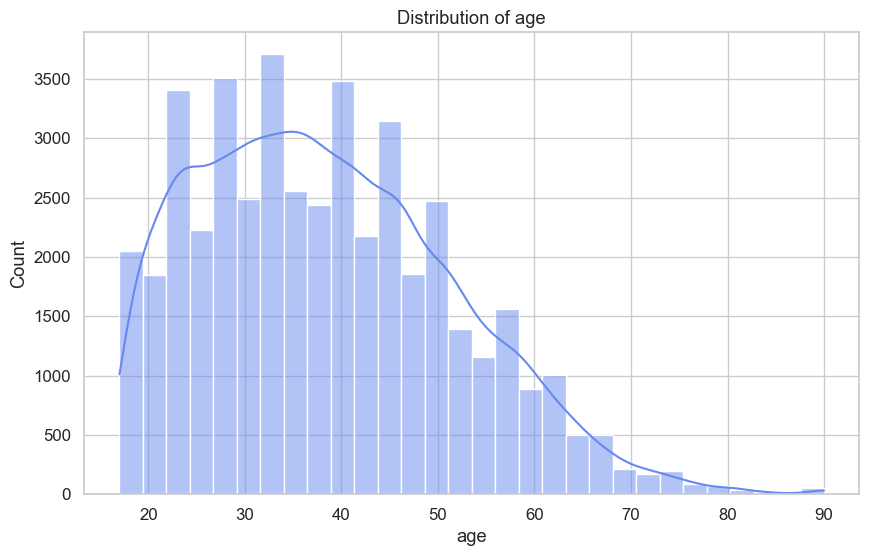

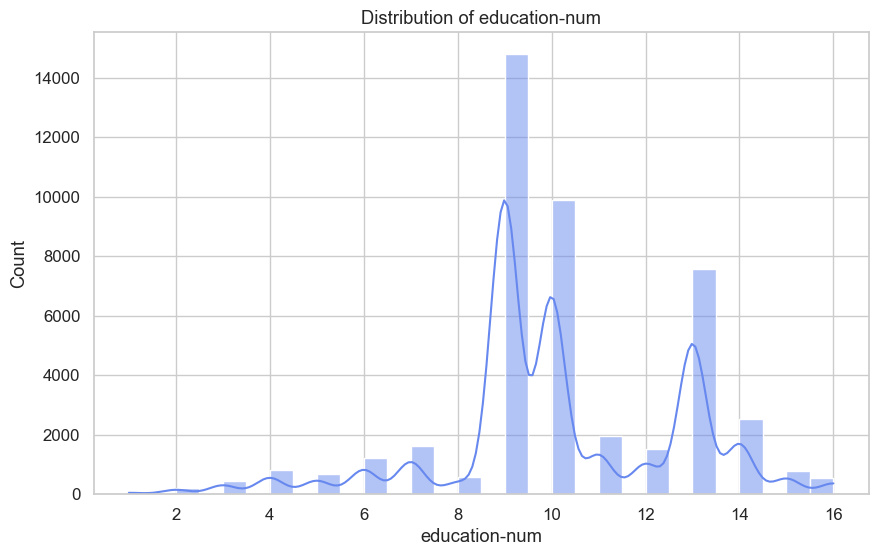

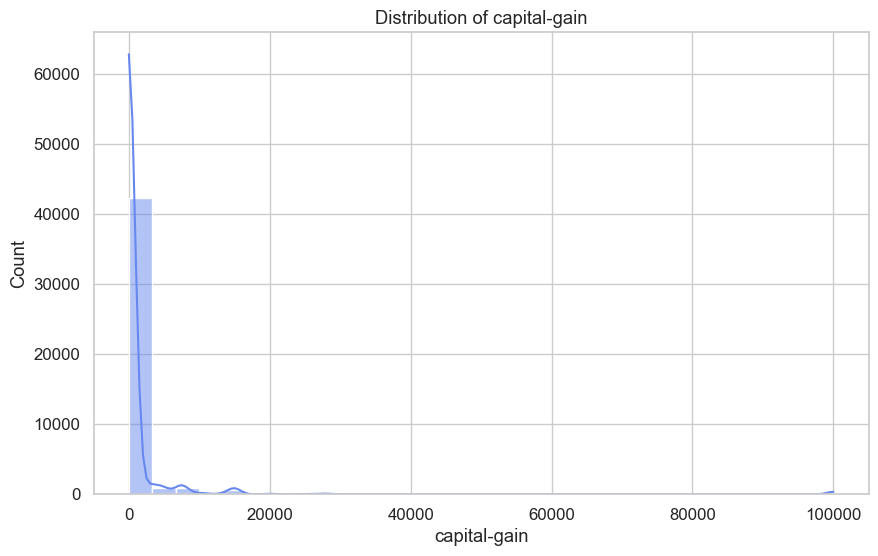

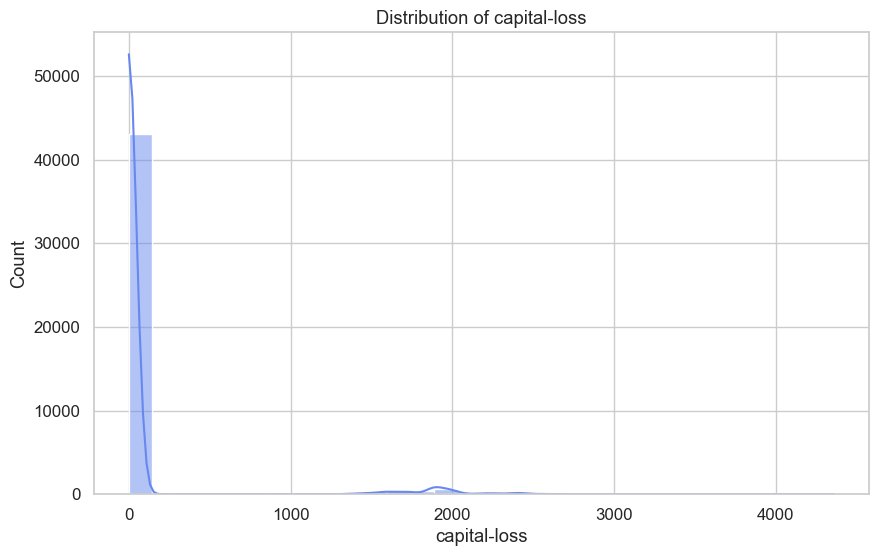

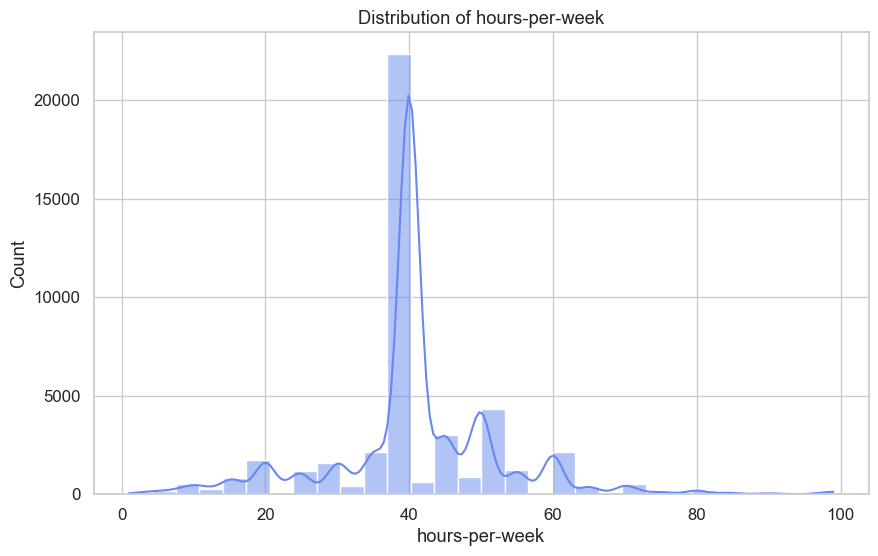

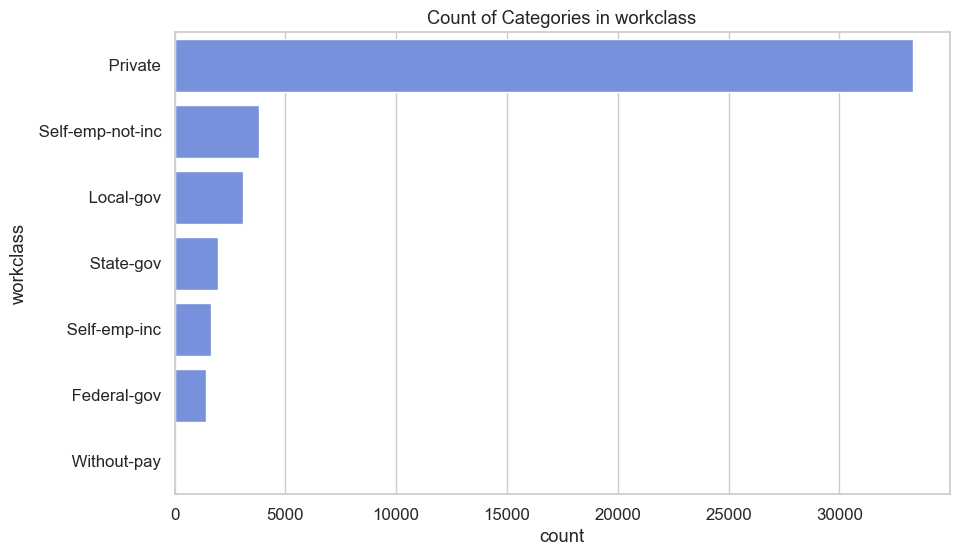

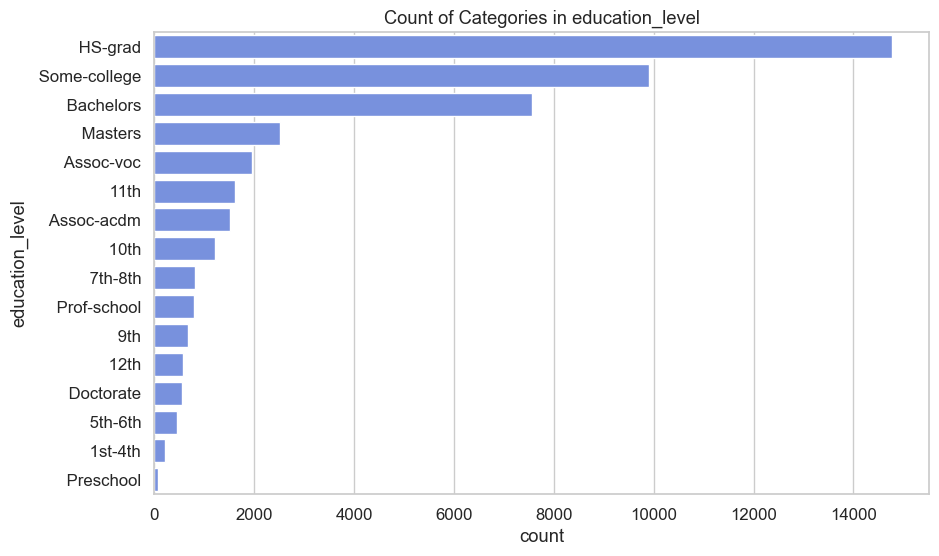

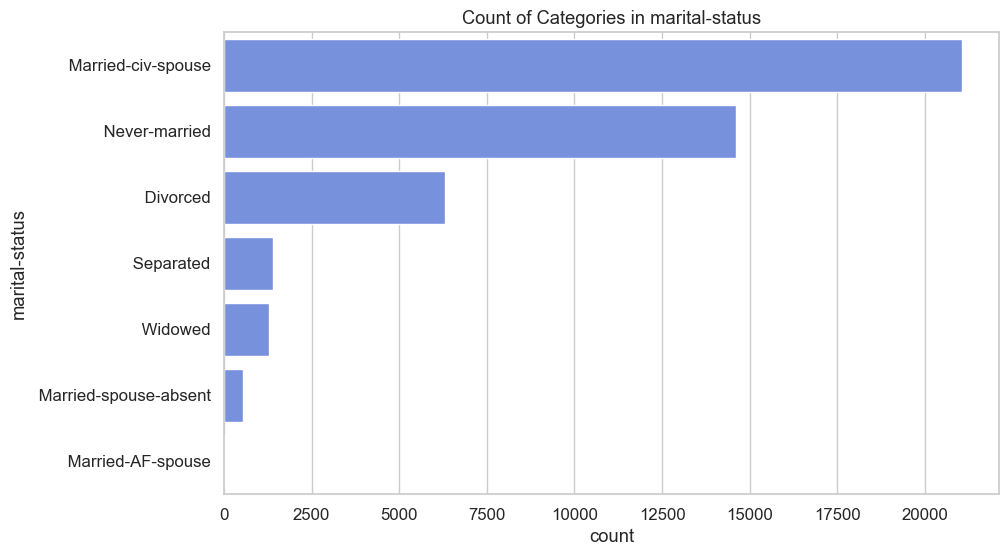

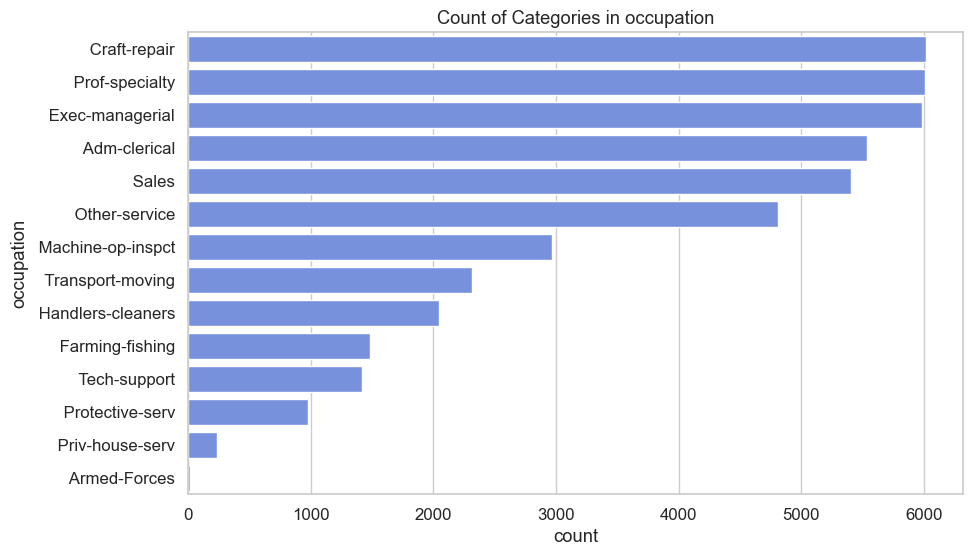

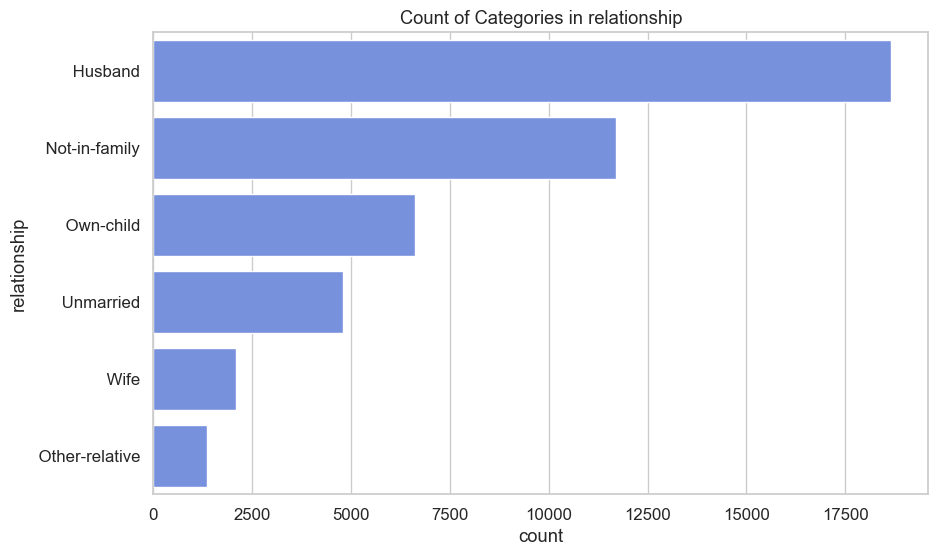

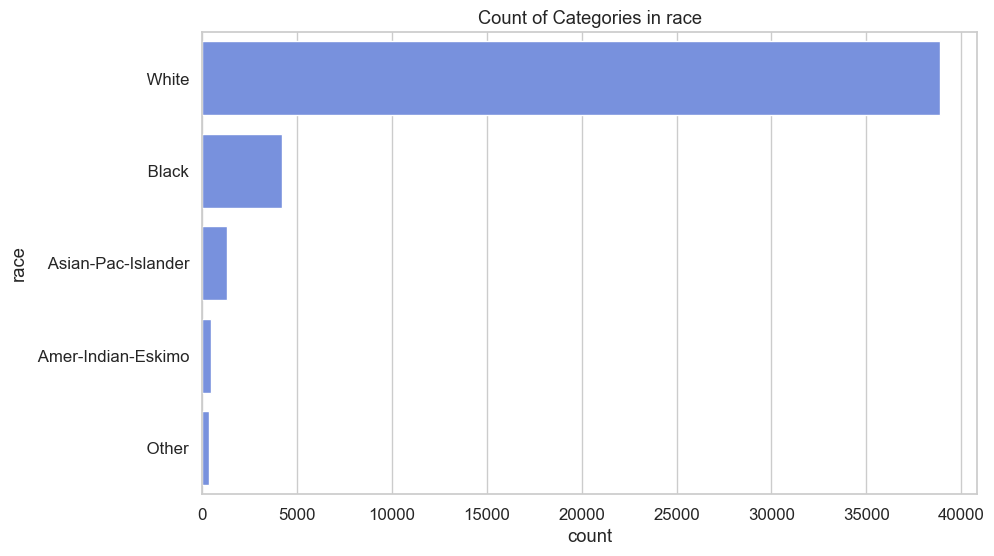

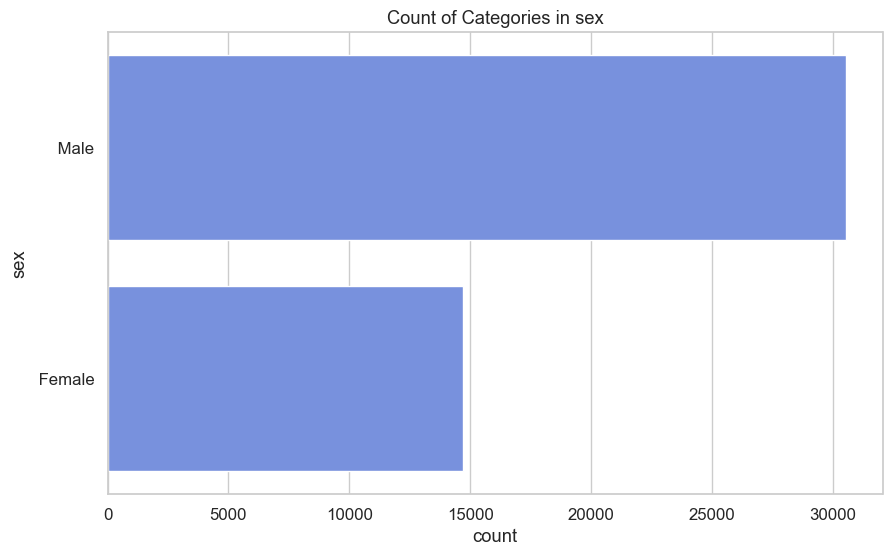

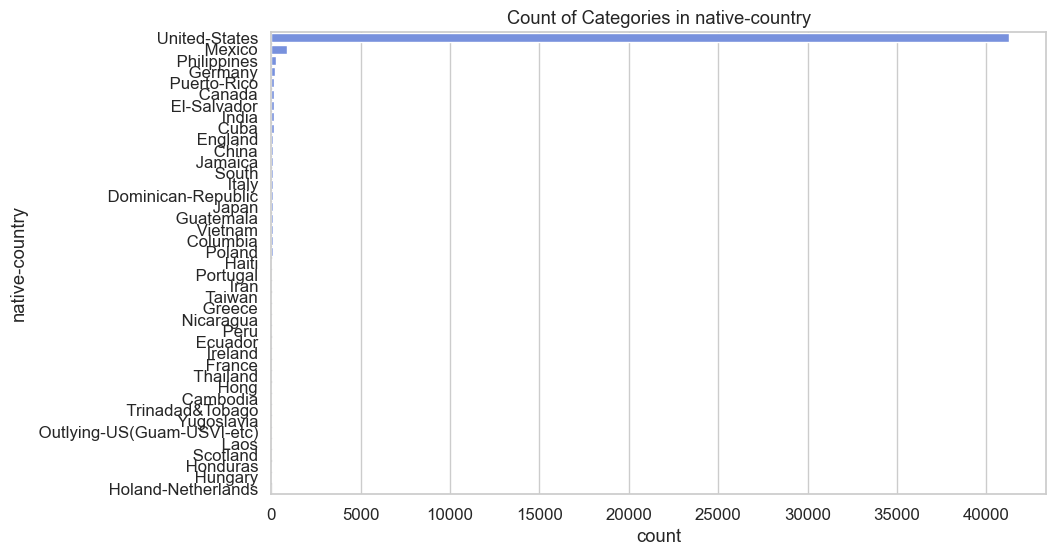

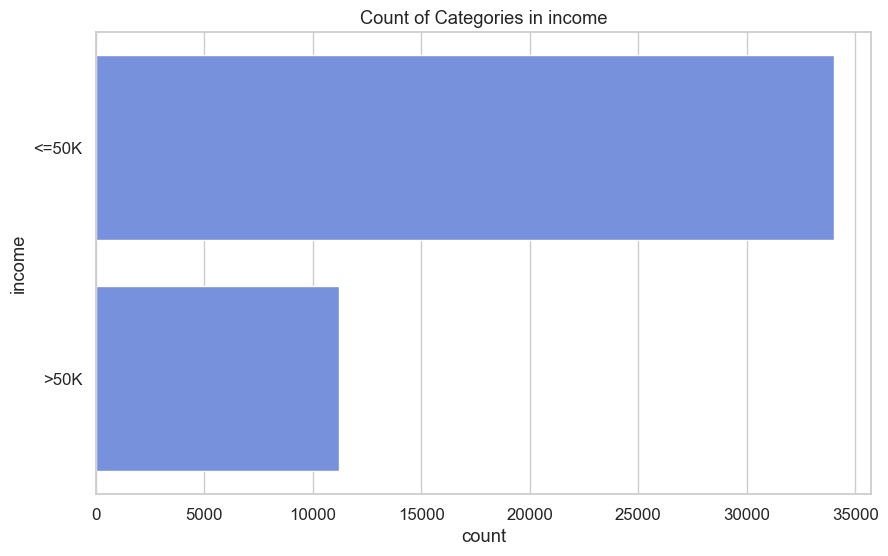

## 🔗 Correlation & Relationships

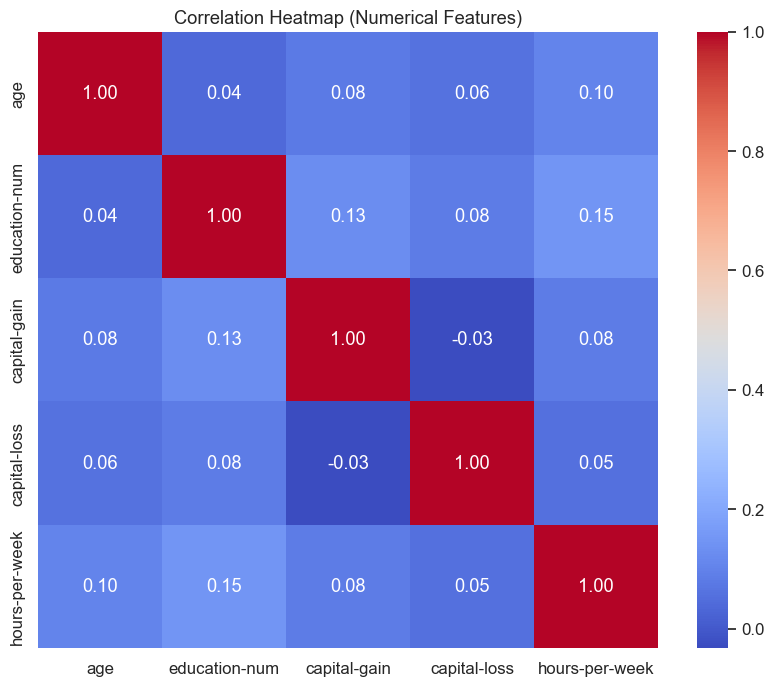

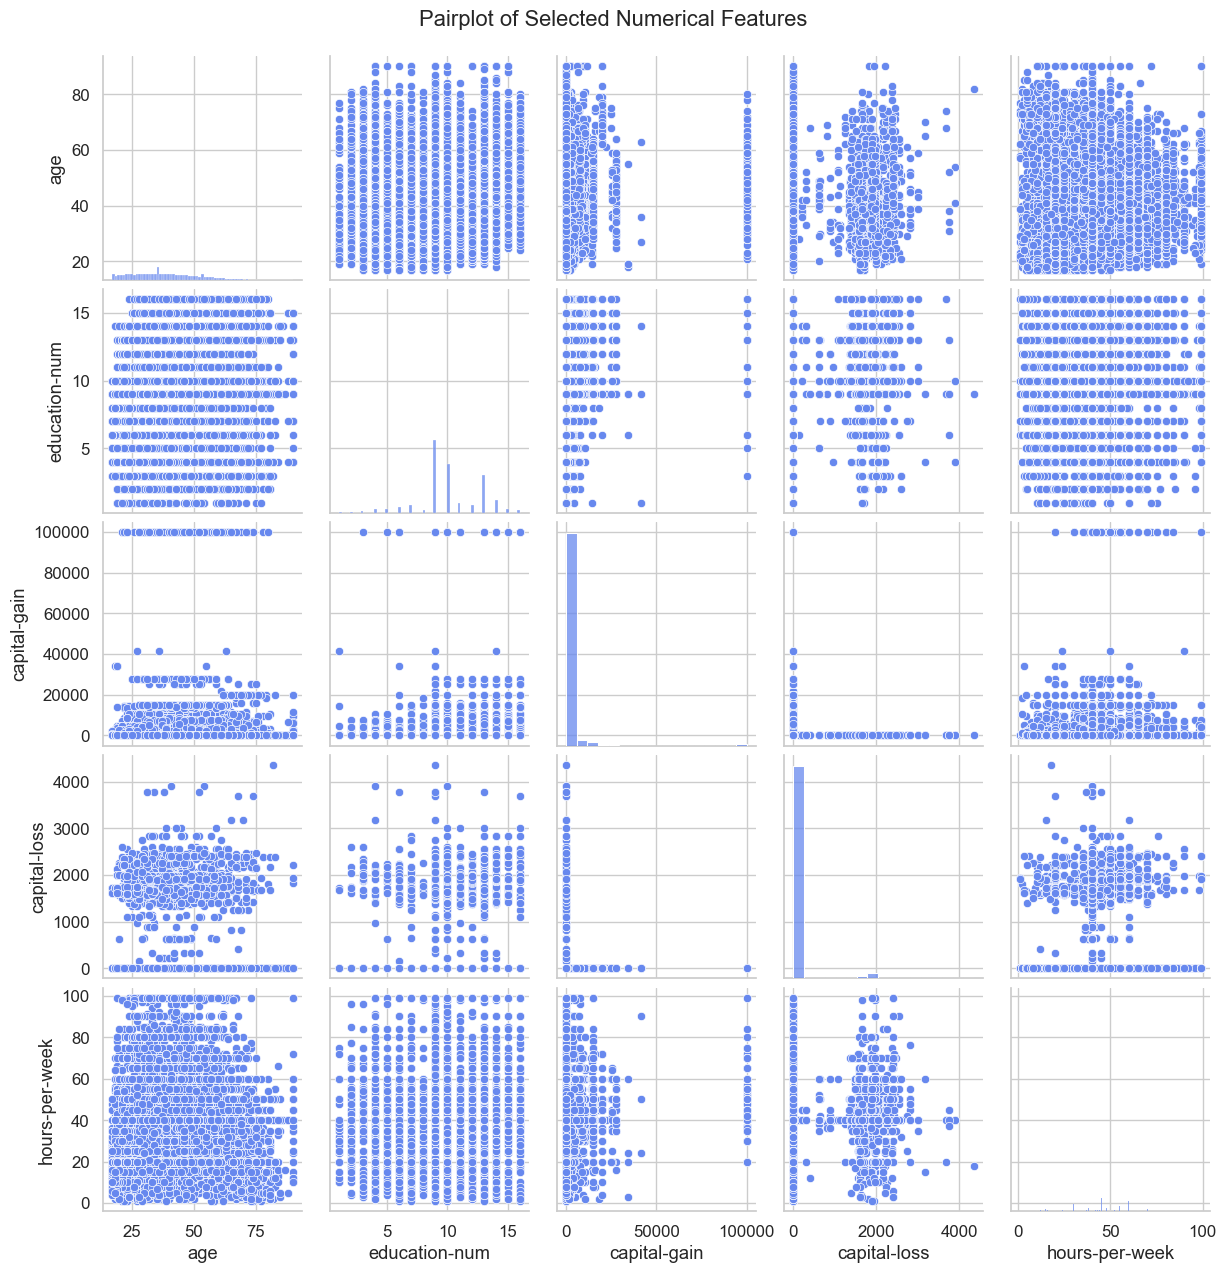

## 🧠 Smart Auto Summary

- ✅ No missing values detected.

- ✅ No high correlation found between numerical features.

- 🔸 Skewed numerical features: ['capital-gain', 'capital-loss']

### ✅ Data Understanding Complete — You're Ready for Preprocessing! 🚀

In [1]:

# ========================
# 1️⃣ IMPORT LIBRARIES
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Visualization settings for professional look
sns.set(style="whitegrid", palette="coolwarm", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

# ========================
# 2️⃣ LOAD THE DATA
# ========================
# Load Census dataset
data = pd.read_csv("census.csv")

display(Markdown("## 🔍 Data Overview"))
display(Markdown(f"*Shape:* {data.shape[0]} rows × {data.shape[1]} columns"))
display(data.head())

# ========================
# 3️⃣ BASIC INFO & TYPES
# ========================
display(Markdown("## 🧩 Data Info and Types"))
data_info = pd.DataFrame({
    "Data Type": data.dtypes,
    "Unique Values": data.nunique(),
    "Missing Values": data.isnull().sum(),
    "Missing (%)": round((data.isnull().sum()/len(data))*100, 2)
})
display(data_info)

# Categorize columns
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

display(Markdown(f"*Categorical Columns ({len(categorical_cols)}):* {categorical_cols}"))
display(Markdown(f"*Numerical Columns ({len(numerical_cols)}):* {numerical_cols}"))

# ========================
# 4️⃣ STATISTICAL SUMMARY
# ========================
display(Markdown("## 📊 Statistical Summary"))
display(data.describe().T)

# ========================
# 5️⃣ ADVANCED NUMERICAL ANALYSIS
# ========================
display(Markdown("## ⚙ Advanced Numerical Analysis"))
num_analysis = data[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max', 'skew', 'kurt'])
display(num_analysis.T)

# Detect potential outliers (IQR Method)
outlier_report = {}
for col in numerical_cols:
    Q1, Q3 = np.percentile(data[col].dropna(), [25, 75])
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_report[col] = outliers

outlier_df = pd.DataFrame.from_dict(outlier_report, orient='index', columns=['Outlier Count'])
display(Markdown("### 🚨 Outlier Detection"))
display(outlier_df)

# ========================
# 6️⃣ VISUALIZATION (DISTRIBUTIONS)
# ========================
display(Markdown("## 🎨 Feature Distributions"))

for col in numerical_cols:
    plt.figure()
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

for col in categorical_cols:
    plt.figure()
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Count of Categories in {col}")
    plt.show()

# ========================
# 7️⃣ RELATIONSHIP ANALYSIS
# ========================
display(Markdown("## 🔗 Correlation & Relationships"))

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# Pairplot for quick insight
sns.pairplot(data[numerical_cols[:5]])
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

# ========================
# 8️⃣ SMART AUTO-SUMMARY
# ========================
display(Markdown("## 🧠 Smart Auto Summary"))

summary = []

# Missing data summary
missing_cols = data_info[data_info["Missing Values"] > 0].index.tolist()
if missing_cols:
    summary.append(f"🔸 Missing values detected in: {missing_cols}")
else:
    summary.append("✅ No missing values detected.")

# Highly correlated columns
corr_matrix = data[numerical_cols].corr().abs()
high_corr = np.where((corr_matrix > 0.8) & (corr_matrix < 1))
corr_pairs = [(numerical_cols[x], numerical_cols[y]) for x, y in zip(*high_corr)]
if corr_pairs:
    summary.append(f"🔸 Highly correlated features: {corr_pairs}")
else:
    summary.append("✅ No high correlation found between numerical features.")

# Skewed columns
skewed = [col for col in numerical_cols if abs(data[col].skew()) > 1]
if skewed:
    summary.append(f"🔸 Skewed numerical features: {skewed}")
else:
    summary.append("✅ No strong skewness detected.")

for s in summary:
    display(Markdown(f"- {s}"))

display(Markdown("### ✅ Data Understanding Complete — You're Ready for Preprocessing! 🚀"))

### Clean, encode, and scale the Census dataset to prepare it for ML modeling.

## Data Preprocessing

In [16]:
# ========================
# 1️⃣ IMPORT LIBRARIES
# ========================
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from IPython.display import display, Markdown

# ========================
# 2️⃣ LOAD THE DATA
# ========================
data = pd.read_csv("Census.csv")

# تنظيف أسماء الأعمدة
data.columns = data.columns.str.strip().str.lower()

# نطبع أسماء الأعمدة للتأكد من الاسم الصحيح
print("🧾 Columns in dataset:", data.columns.tolist())

display(Markdown("## 🧩 Data Preprocessing Phase"))
display(Markdown(f"Initial Shape: {data.shape[0]} rows × {data.shape[1]} columns"))

# ========================
# 3️⃣ HANDLE MISSING VALUES
# ========================
display(Markdown("### 🧼 Step 1: Handling Missing Values"))

data.replace("?", np.nan, inplace=True)
data.dropna(inplace=True)

# ========================
# 4️⃣ CREATE TARGET COLUMN (if needed)
# ========================
display(Markdown("### 🎯 Step 2: Creating Target Column 'donate'"))

# نتاكد من وجود عمود donate بالفعل
if 'donate' not in data.columns:
    if 'income' in data.columns:
        data['donate'] = data['income'].apply(lambda x: 1 if '>50K' in str(x).replace(" ", "") else 0)
        print("✅ Target column 'donate' created successfully!")
    else:
        raise ValueError("❌ Couldn't find 'income' column to create 'donate'!")
else:
    print("ℹ Column 'donate' already exists. Skipping creation.")

print(data[['income', 'donate']].head())

# ========================
# 5️⃣ SPLIT FEATURES
# ========================
# الأعمدة الفئوية (نصية)
categorical_cols = ['workclass', 'education_level', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country']

# الأعمدة الرقمية
numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

display(Markdown(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}"))
display(Markdown(f"Numerical Columns ({len(numerical_cols)}): {numerical_cols}"))

# ========================
# 6️⃣ DEFINE TRANSFORMERS
# ========================
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# ========================
# 7️⃣ APPLY TRANSFORMATIONS
# ========================
# نحذف income وdonate من X عشان مش عايزين ندرب عليهم
X = data.drop(columns=['income', 'donate'])
y = data['donate']

# نطبق التحويلات
X_processed = preprocessor.fit_transform(X)

# نستخرج أسماء الأعمدة بعد الـ encoding
encoded_cat_features = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
processed_feature_names = np.concatenate([numerical_cols, encoded_cat_features])

# نرجع DataFrame منظم
processed_df = pd.DataFrame(X_processed, columns=processed_feature_names)
processed_df['donate'] = y.values

display(Markdown(f"✅ Final Processed Shape: {processed_df.shape[0]} rows × {processed_df.shape[1]} columns"))
display(processed_df.head())

# ========================
# 8️⃣ VALIDATION & REPORT
# ========================
display(Markdown("### Validation & Summary"))

# Verify no missing values remain
missing_final = processed_df.isnull().sum().sum()
display(Markdown(f"- ✅ Missing values after preprocessing: *{missing_final}*"))

# Confirm scaling normalization range
mean_std = processed_df[numerical_cols].agg(['mean', 'std']).T
display(Markdown("#### ⚖ Scaled Feature Stats"))
display(mean_std)

# Basic sanity check
assert processed_df.shape[0] == data.shape[0], "⚠ Data count mismatch after preprocessing!"

display(Markdown("""
✅ *Preprocessing Complete!*  
- All categorical features encoded  
- Numerical features scaled  
- Target column 'donate' created  
- Dataset ready for training phase 🚀
"""))

# حفظ الملف النهائي
processed_df.to_csv("cleaned_census.csv", index=False)
print("\n💾 Data preprocessing done successfully! Saved as cleaned_census.csv")

🧾 Columns in dataset: ['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


## 🧩 Data Preprocessing Phase

Initial Shape: 45222 rows × 14 columns

### 🧼 Step 1: Handling Missing Values

### 🎯 Step 2: Creating Target Column 'donate'

✅ Target column 'donate' created successfully!
  income  donate
0  <=50K       0
1  <=50K       0
2  <=50K       0
3  <=50K       0
4  <=50K       0


Categorical Columns (8): ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

Numerical Columns (5): ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

✅ Final Processed Shape: 45222 rows × 104 columns

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,donate
0,0.034201,1.128753,0.142888,-0.21878,-0.078120,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.866417,1.128753,-0.146733,-0.21878,-2.326738,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.041455,-0.438122,-0.146733,-0.21878,-0.078120,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,1.093385,-1.221559,-0.146733,-0.21878,-0.078120,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-0.798015,1.128753,-0.146733,-0.21878,-0.078120,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Validation & Summary

- ✅ Missing values after preprocessing: *0*

#### ⚖ Scaled Feature Stats

,mean,std
age,-2.325424e-17,1.000011
education-num,1.655293e-16,1.000011
capital-gain,-1.971897e-17,1.000011
capital-loss,2.498260e-17,1.000011
hours-per-week,2.144732e-16,1.000011



✅ *Preprocessing Complete!*  
- All categorical features encoded  
- Numerical features scaled  
- Target column 'donate' created  
- Dataset ready for training phase 🚀



💾 Data preprocessing done successfully! Saved as cleaned_census.csv


### Split the cleaned and preprocessed dataset into training and testing sets for fair model evaluation.

## Splitting Data

In [17]:

# ========================
# 1️⃣ IMPORT LIBRARIES
# ========================
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown

# ========================
# 2️⃣ LOAD THE PROCESSED DATA
# ========================
# Load the processed dataset from the previous phase
processed_df = pd.read_csv("cleaned_census.csv")  # or use the DataFrame from memory

display(Markdown("## 🧮 Data Splitting Phase"))
display(Markdown(f"*Dataset Shape:* {processed_df.shape[0]} rows × {processed_df.shape[1]} columns"))

# ========================
# 3️⃣ SPLIT FEATURES & TARGET
# ========================
X = processed_df.drop("donate", axis=1)
y = processed_df["donate"]

display(Markdown("### 🎯 Target Variable Distribution (Overall)"))
display(y.value_counts(normalize=True).rename("Proportion"))

# ========================
# 4️⃣ STRATIFIED TRAIN-TEST SPLIT
# ========================
display(Markdown("### ✂ Step 1: Splitting the Dataset"))

# Stratified split ensures class balance is preserved
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,             # 20% for testing
    stratify=y,                # maintain class ratio
    random_state=42,           # reproducibility
    shuffle=True
)

# ========================
# 5️⃣ SHOW SHAPES AND STATS
# ========================
display(Markdown("### 📊 Step 2: Data Integrity Check"))

summary_split = pd.DataFrame({
    "Set": ["Train", "Test"],
    "Samples": [len(X_train), len(X_test)],
    "Percentage": [len(X_train)/len(X)*100, len(X_test)/len(X)*100]
})

display(summary_split)

display(Markdown("#### 🎯 Target Distribution Comparison"))

train_dist = y_train.value_counts(normalize=True).rename("Train Proportion") * 100
test_dist  = y_test.value_counts(normalize=True).rename("Test Proportion") * 100
compare_dist = pd.concat([train_dist, test_dist], axis=1)
display(compare_dist.round(2))

# ========================
# 6️⃣ ADVANCED VALIDATION
# ========================
display(Markdown("### 🧠 Step 3: Smart Validation Checks"))

assert abs(compare_dist.iloc[0,0] - compare_dist.iloc[0,1]) < 1, "⚠ Class imbalance detected!"
assert X_train.shape[1] == X_test.shape[1], "⚠ Feature mismatch between train/test!"
display(Markdown("✅ *Data split validated successfully — No class imbalance or feature mismatch found!*"))

# ========================
# 7️⃣ SAVE SPLIT DATASETS (OPTIONAL)
# ========================
display(Markdown("### 💾 Step 4: Saving Datasets for Next Phase"))

X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

display(Markdown("""
✅ *Splitting Complete!*  
- Training set → 80%  
- Test set → 20%  
- Stratified by target distribution  
- Random state = 42 for reproducibility  
- Files saved for model training phase 🚀
"""))

## 🧮 Data Splitting Phase

*Dataset Shape:* 45222 rows × 104 columns

### 🎯 Target Variable Distribution (Overall)

donate
0    0.752156
1    0.247844
Name: Proportion, dtype: float64

### ✂ Step 1: Splitting the Dataset

### 📊 Step 2: Data Integrity Check

,Set,Samples,Percentage
0,Train,36177,79.998673
1,Test,9045,20.001327


#### 🎯 Target Distribution Comparison

,Train Proportion,Test Proportion
donate,,
0,75.22,75.21
1,24.78,24.79


### 🧠 Step 3: Smart Validation Checks

✅ *Data split validated successfully — No class imbalance or feature mismatch found!*

### 💾 Step 4: Saving Datasets for Next Phase


✅ *Splitting Complete!*  
- Training set → 80%  
- Test set → 20%  
- Stratified by target distribution  
- Random state = 42 for reproducibility  
- Files saved for model training phase 🚀


### Establish a baseline performance using a naive predictor that assumes every individual will donate (donate=1).

## Naive Predictor

## 🧠 Naive Predictor Phase

*Train set:* 36177 samples  |  *Test set:* 9045 samples

### 🧩 Step 1: Define Naive Assumption


We assume *every person will donate (donate=1)*.  
This is a naive but important baseline to compare our future models.


### 📊 Step 2: Evaluate the Naive Model

,Metric,Value
0,Accuracy,0.2479
1,Precision,0.2479
2,Recall,1.0000
3,F1-score,0.3973


### ⚖ Step 3: Analyze Class Distribution

- *Actual Donors in Test Set:* 24.79%

- *Naive Prediction:* Predicts 100% Donors (Bias towards positive class)

### 🎨 Step 4: Confusion Matrix Visualization

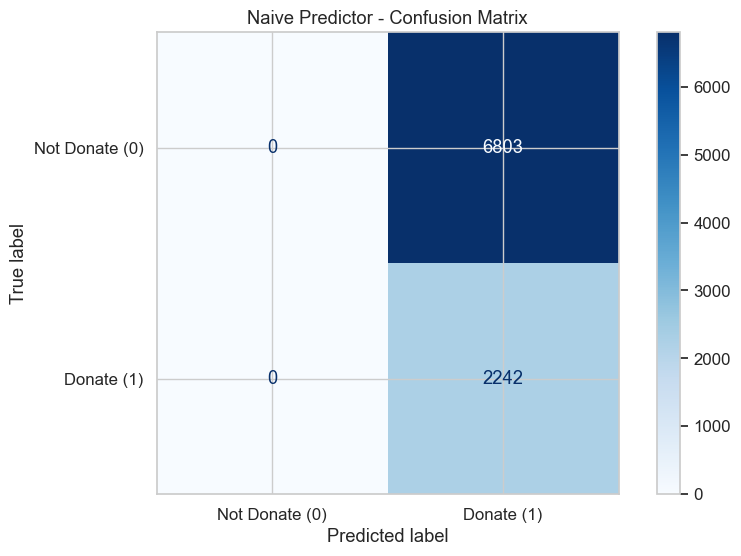

### 🧠 Step 5: Smart Interpretation


- ✅ *Accuracy:* 24.79%  
   → Percentage of total correct predictions (both 1s and 0s).  
- ⚠ *Precision:* 24.79%  
   → Out of all predicted donors, how many actually donate.  
- 🔁 *Recall:* 100.00%  
   → Out of all true donors, how many did we correctly identify.  
- 💡 *F1-score:* 39.73%  
   → Balance between Precision & Recall.  

🧩 Because the model predicts “everyone donates”, it achieves high Recall (captures all real donors),
but very poor Precision — meaning it assumes too many non-donors are donors.

🎯 This model gives us a *baseline accuracy = 24.79%*,  
and our advanced models must *significantly outperform this score* to prove their value.


### ✅ Naive Predictor Completed — Baseline Established 🚀

In [18]:

# ========================
# 1️⃣ IMPORT LIBRARIES
# ========================
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

# ========================
# 2️⃣ LOAD TRAIN/TEST DATA
# ========================
y_train = pd.read_csv("y_train.csv").squeeze()
y_test = pd.read_csv("y_test.csv").squeeze()

display(Markdown("## 🧠 Naive Predictor Phase"))
display(Markdown(f"*Train set:* {len(y_train)} samples  |  *Test set:* {len(y_test)} samples"))

# ========================
# 3️⃣ BASELINE STRATEGY
# ========================
display(Markdown("### 🧩 Step 1: Define Naive Assumption"))

# Naive rule → assume everyone will donate (predict 1 for all)
naive_predictions = np.ones_like(y_test)

display(Markdown("""
We assume *every person will donate (donate=1)*.  
This is a naive but important baseline to compare our future models.
"""))

# ========================
# 4️⃣ CALCULATE METRICS
# ========================
display(Markdown("### 📊 Step 2: Evaluate the Naive Model"))

# Calculate basic metrics
accuracy  = accuracy_score(y_test, naive_predictions)
precision = precision_score(y_test, naive_predictions)
recall    = recall_score(y_test, naive_predictions)
f1        = f1_score(y_test, naive_predictions)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Value": [accuracy, precision, recall, f1]
})
display(metrics_df.round(4))

# ========================
# 5️⃣ CLASS DISTRIBUTION ANALYSIS
# ========================
display(Markdown("### ⚖ Step 3: Analyze Class Distribution"))

true_ratio = y_test.mean() * 100
display(Markdown(f"- *Actual Donors in Test Set:* {true_ratio:.2f}%"))
display(Markdown(f"- *Naive Prediction:* Predicts 100% Donors (Bias towards positive class)"))

# ========================
# 6️⃣ CONFUSION MATRIX VISUALIZATION
# ========================
display(Markdown("### 🎨 Step 4: Confusion Matrix Visualization"))

cm = confusion_matrix(y_test, naive_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Donate (0)", "Donate (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Naive Predictor - Confusion Matrix")
plt.show()

# ========================
# 7️⃣ SMART INTERPRETATION
# ========================
display(Markdown("### 🧠 Step 5: Smart Interpretation"))

interpretation = f"""
- ✅ *Accuracy:* {accuracy:.2%}  
   → Percentage of total correct predictions (both 1s and 0s).  
- ⚠ *Precision:* {precision:.2%}  
   → Out of all predicted donors, how many actually donate.  
- 🔁 *Recall:* {recall:.2%}  
   → Out of all true donors, how many did we correctly identify.  
- 💡 *F1-score:* {f1:.2%}  
   → Balance between Precision & Recall.  

🧩 Because the model predicts “everyone donates”, it achieves high Recall (captures all real donors),
but very poor Precision — meaning it assumes too many non-donors are donors.

🎯 This model gives us a *baseline accuracy = {accuracy:.2%}*,  
and our advanced models must *significantly outperform this score* to prove their value.
"""
display(Markdown(interpretation))

display(Markdown("### ✅ Naive Predictor Completed — Baseline Established 🚀"))

### Train multiple models, compare performance, and identify the best-performing algorithm using advanced evaluation.

## Model Training

📂 Loading preprocessed data...
✅ Data Loaded Successfully! Shape: (45222, 103)
📊 Train samples: 36177 | Test samples: 9045

⚙ Running cross-validation and model comparison...
✅ Logistic Regression: Accuracy=0.8487, F1=0.6657
✅ Decision Tree: Accuracy=0.8148, F1=0.6177
✅ Random Forest: Accuracy=0.8414, F1=0.6607
✅ XGBoost: Accuracy=0.8691, F1=0.7145
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7173, number of negative: 21768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 28941, number of used features: 90
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247849 -> initscore=-1.110117
[LightGBM] [Info] Start training from score -1.110117
[LightGBM] [W

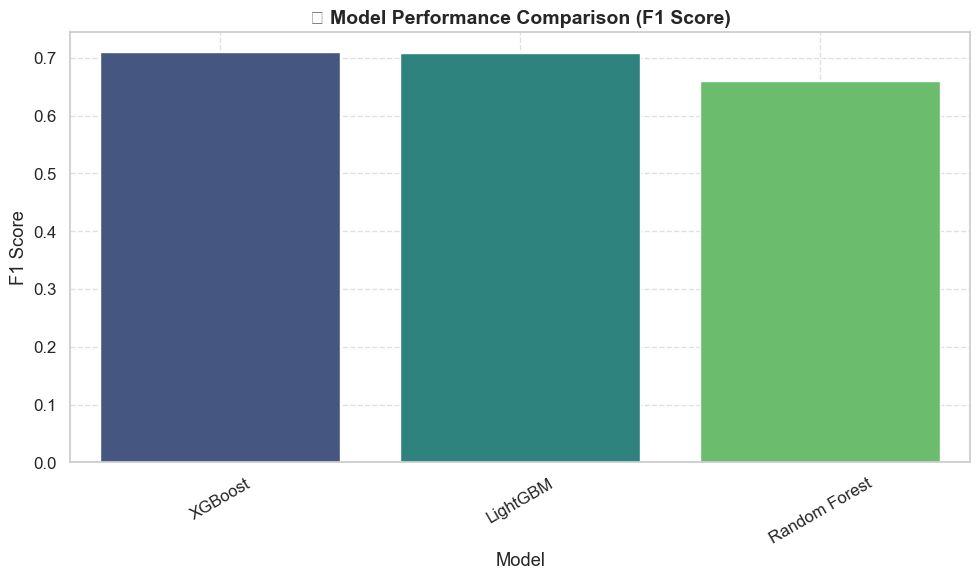


🏆 Best Model: XGBoost

               precision    recall  f1-score   support

Non-Donor (0)       0.89      0.94      0.91      6803
    Donor (1)       0.78      0.65      0.71      2242

     accuracy                           0.87      9045
    macro avg       0.83      0.80      0.81      9045
 weighted avg       0.86      0.87      0.86      9045



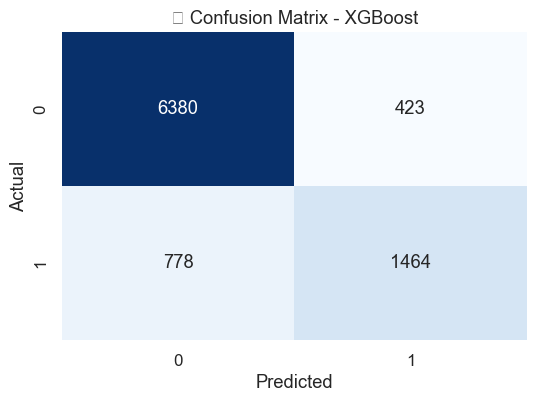

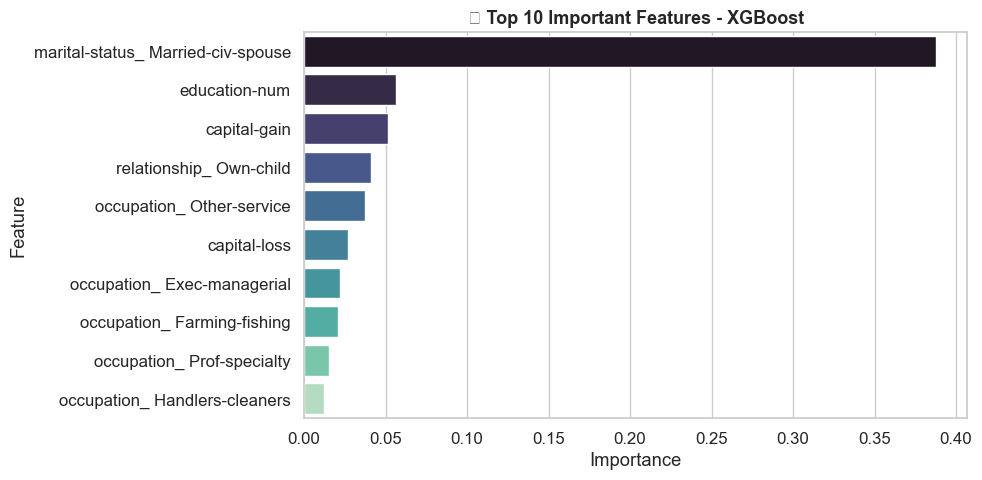

🎯 The most influential features in predicting donor likelihood:
                               Feature  Importance
30  marital-status_ Married-civ-spouse    0.387521
1                        education-num    0.056407
2                         capital-gain    0.051439
52             relationship_ Own-child    0.041328
42           occupation_ Other-service    0.037242
3                         capital-loss    0.026710
38         occupation_ Exec-managerial    0.022101
39         occupation_ Farming-fishing    0.020965
44          occupation_ Prof-specialty    0.015459
40       occupation_ Handlers-cleaners    0.012047

✅ Model training and evaluation completed successfully!
🏆 Best performing model: XGBoost
               Accuracy  Precision    Recall  F1 Score
XGBoost        0.867219   0.775835  0.652988  0.709131
LightGBM       0.867883   0.780998  0.648974  0.708892
Random Forest  0.843228   0.713251  0.614630  0.660278


In [20]:

# ========================
# 1️⃣ IMPORT LIBRARIES
# ========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


# ========================
# 2️⃣ LOAD PROCESSED DATA
# ========================
print("📂 Loading preprocessed data...")
data = pd.read_csv("cleaned_census.csv")

# Separate features & target
X = data.drop("donate", axis=1)
y = data["donate"]

print(f"✅ Data Loaded Successfully! Shape: {X.shape}")


# ========================
# 3️⃣ SPLIT DATA (AGAIN FOR SAFETY)
# ========================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Train samples: {X_train.shape[0]} | Test samples: {X_test.shape[0]}")


# ========================
# 4️⃣ DEFINE MODELS
# ========================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


# ========================
# 5️⃣ ADVANCED CROSS VALIDATION
# ========================
print("\n⚙ Running cross-validation and model comparison...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for name, model in models.items():
    acc = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy').mean()
    f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1').mean()
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})
    print(f"✅ {name}: Accuracy={acc:.4f}, F1={f1:.4f}")

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)


# ========================
# 6️⃣ TRAIN & EVALUATE BEST MODELS
# ========================
best_models = ["Random Forest", "XGBoost", "LightGBM"]
evaluation = {}

for model_name in best_models:
    model = models[model_name]
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    evaluation[model_name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds)
    }

# Convert to DataFrame for visualization
eval_df = pd.DataFrame(evaluation).T.sort_values(by="F1 Score", ascending=False)

# ========================
# 7️⃣ VISUAL COMPARISON
# ========================
plt.figure(figsize=(10,6))
sns.barplot(data=eval_df.reset_index(), x="index", y="F1 Score", palette="viridis")
plt.title("🔍 Model Performance Comparison (F1 Score)", fontsize=14, weight='bold')
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.xticks(rotation=30)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# ========================
# 8️⃣ DETAILED REPORT FOR BEST MODEL
# ========================
best_model_name = eval_df.index[0]
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f"\n🏆 Best Model: {best_model_name}\n")
print(classification_report(y_test, y_pred, target_names=["Non-Donor (0)", "Donor (1)"]))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"🧩 Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ========================
# 9️⃣ ADVANCED FEATURE IMPORTANCE (if available)
# ========================
if hasattr(best_model, "feature_importances_"):
    importance = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": best_model.feature_importances_
    }).sort_values(by="Importance", ascending=False).head(10)

    plt.figure(figsize=(10,5))
    sns.barplot(data=importance, x="Importance", y="Feature", palette="mako")
    plt.title(f"💡 Top 10 Important Features - {best_model_name}", fontsize=13, weight='bold')
    plt.tight_layout()
    plt.show()

    print("🎯 The most influential features in predicting donor likelihood:")
    print(importance)


# ========================
# 🔚 CONCLUSION
# ========================
print("\n✅ Model training and evaluation completed successfully!")
print(f"🏆 Best performing model: {best_model_name}")
print(eval_df)


### Evaluate all trained models using multiple performance metrics and visualizations to identify the most reliable one.

## Model Evalution

📂 Loading data & trained models...

⚙ Training models for evaluation...

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
✅ All models trained successfully!

📊 Evaluating model performance...

🏆 Overall Performance Summary:

                 Model  Accuracy  Precision    Recall  F1 Score
3              XGBoost  0.867219   0.775835  0.652988  0.709131
4             LightGBM  0.867883   0.780998  0.648974  0.708

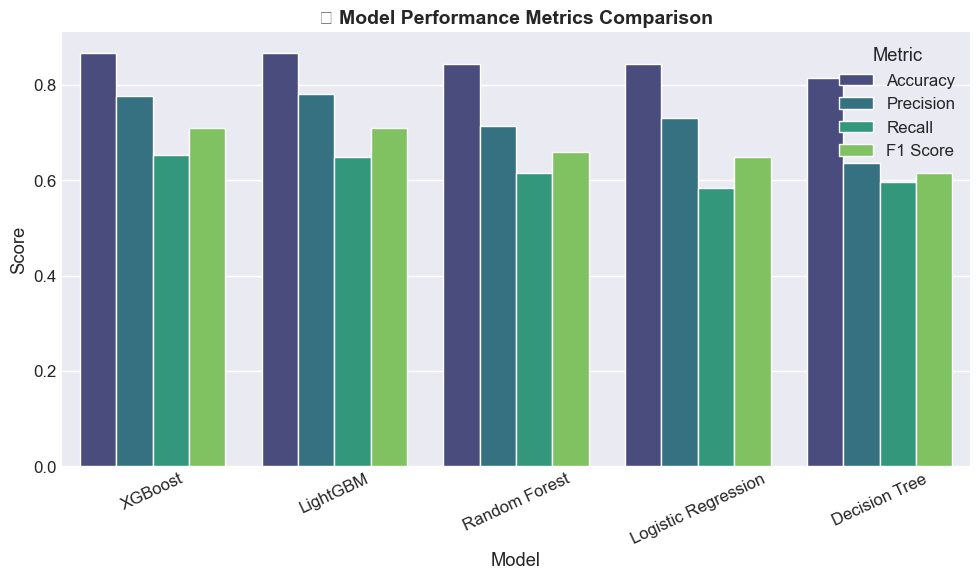

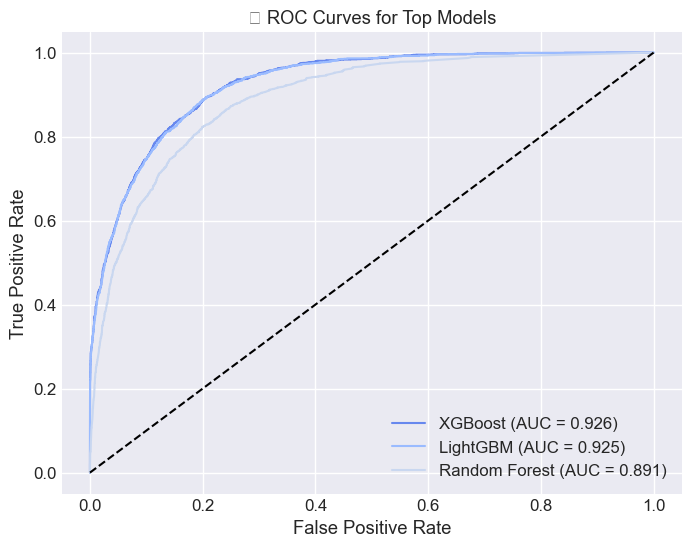

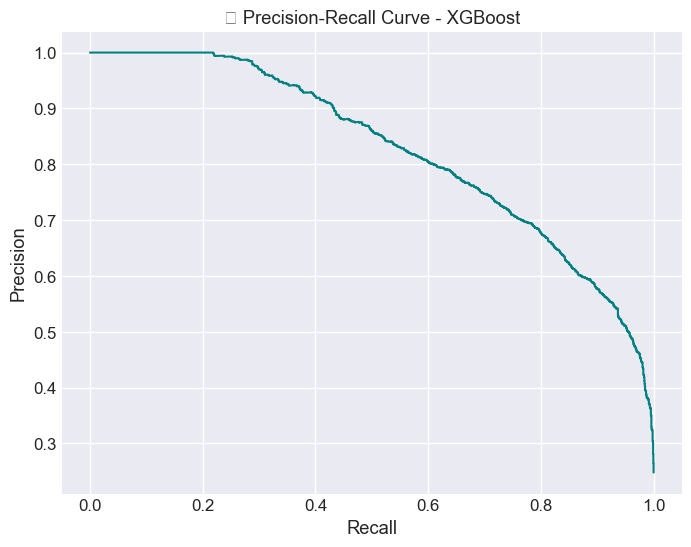

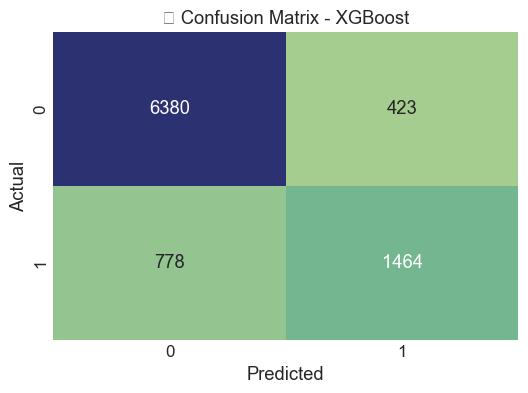


📄 Detailed Classification Report for XGBoost:

               precision    recall  f1-score   support

Non-Donor (0)       0.89      0.94      0.91      6803
    Donor (1)       0.78      0.65      0.71      2242

     accuracy                           0.87      9045
    macro avg       0.83      0.80      0.81      9045
 weighted avg       0.86      0.87      0.86      9045


✅ Evaluation completed successfully!
🏆 Best model based on F1-score: XGBoost

Final Performance Table:


,Model,Accuracy,Precision,Recall,F1 Score
3,XGBoost,0.867219,0.775835,0.652988,0.709131
4,LightGBM,0.867883,0.780998,0.648974,0.708892
2,Random Forest,0.843228,0.713251,0.614630,0.660278
0,Logistic Regression,0.843449,0.730469,0.583854,0.648984
1,Decision Tree,0.815478,0.636105,0.597235,0.616057


In [ ]:

# ========================
# 1️⃣ IMPORT LIBRARIES
# ========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay,
    precision_recall_curve
)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')

# ========================
# 2️⃣ LOAD TRAINED MODELS DATA
# ========================
print("📂 Loading data & trained models...")
data = pd.read_csv("cleaned_census.csv")

X = data.drop("donate", axis=1)
y = data["donate"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Import models again for evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# ========================
# 3️⃣ TRAIN MODELS (again to evaluate freshly)
# ========================
print("\n⚙ Training models for evaluation...\n")
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

print("✅ All models trained successfully!")


# ========================
# 4️⃣ EVALUATE ALL MODELS
# ========================
print("\n📊 Evaluating model performance...")
evaluation = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    evaluation.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": pre,
        "Recall": rec,
        "F1 Score": f1
    })
    
eval_df = pd.DataFrame(evaluation).sort_values(by="F1 Score", ascending=False)
print("\n🏆 Overall Performance Summary:\n")
print(eval_df)


# ========================
# 5️⃣ VISUAL COMPARISON
# ========================
plt.figure(figsize=(10,6))
sns.barplot(data=eval_df.melt(id_vars="Model"), x="Model", y="value", hue="variable", palette="viridis")
plt.title("🔍 Model Performance Metrics Comparison", fontsize=14, weight='bold')
plt.ylabel("Score")
plt.xticks(rotation=25)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


# ========================
# 6️⃣ ROC CURVE & AUC (for top 3 models)
# ========================
from sklearn.metrics import roc_auc_score

plt.figure(figsize=(8,6))
for name in eval_df["Model"].head(3):
    model = trained_models[name]
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("💡 ROC Curves for Top Models")
plt.legend(loc="lower right")
plt.show()


# ========================
# 7️⃣ PRECISION-RECALL CURVE (for best model)
# ========================
best_model_name = eval_df.iloc[0]["Model"]
best_model = trained_models[best_model_name]
y_prob = best_model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color="teal")
plt.title(f"🎯 Precision-Recall Curve - {best_model_name}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


# ========================
# 8️⃣ CONFUSION MATRIX (for best model)
# ========================
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="crest", cbar=False)
plt.title(f"📊 Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ========================
# 9️⃣ DETAILED CLASSIFICATION REPORT
# ========================
print(f"\n📄 Detailed Classification Report for {best_model_name}:\n")
print(classification_report(y_test, y_pred, target_names=["Non-Donor (0)", "Donor (1)"]))

# ========================
# 🔚 CONCLUSION
# ========================
print("\n✅ Evaluation completed successfully!")
print(f"🏆 Best model based on F1-score: {best_model_name}")
print("\nFinal Performance Table:")
display(eval_df.style.background_gradient(cmap="YlGnBu"))

### Find the optimal model parameters using GridSearchCV, RandomizedSearchCV, and Optuna Bayesian Optimization.

## Hyperparamter Tuning

In [1]:
# ========================
# 1️⃣ IMPORT LIBRARIES
# ========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

# ========================
# 2️⃣ LOAD CLEANED DATA
# ========================
print("📂 Loading preprocessed data...")
data = pd.read_csv("cleaned_census.csv")

X = data.drop("donate", axis=1)
y = data["donate"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Data ready. Train: {X_train.shape}, Test: {X_test.shape}")

# ============================================================
# 🎛 PART 1: GRID SEARCH (Exhaustive Search)
# ============================================================
print("\n🔍 Running GridSearchCV for Random Forest...")

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print(f"🏆 Best RandomForest Params (GridSearch):\n{grid_search.best_params_}\n")


c:\Users\Khaled\Depi_Amit_A1_BNS3\Depi_Amit_A1_BNS3\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📂 Loading preprocessed data...
✅ Data ready. Train: (36177, 103), Test: (9045, 103)

🔍 Running GridSearchCV for Random Forest...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
🏆 Best RandomForest Params (GridSearch):
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}




🎲 Running RandomizedSearchCV for XGBoost...
Fitting 3 folds for each of 25 candidates, totalling 75 fits


[I 2025-10-14 00:10:02,336] A new study created in memory with name: no-name-56d3adf8-a456-4757-aed6-ac2e7be0851f


🏆 Best XGBoost Params (RandomizedSearch):
{'subsample': 0.6, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.08249999999999999, 'colsample_bytree': 0.6}


🧠 Running Optuna Bayesian Optimization for LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182


[I 2025-10-14 00:10:11,998] Trial 0 finished with value: 0.709583028529627 and parameters: {'num_leaves': 23, 'max_depth': 12, 'learning_rate': 0.025672481801489615, 'n_estimators': 351, 'subsample': 0.6342547516288416, 'colsample_bytree': 0.9251507931229392}. Best is trial 0 with value: 0.709583028529627.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182


[I 2025-10-14 00:11:04,931] Trial 1 finished with value: 0.7002731561956792 and parameters: {'num_leaves': 35, 'max_depth': 8, 'learning_rate': 0.017203012679442006, 'n_estimators': 383, 'subsample': 0.9376588380409843, 'colsample_bytree': 0.7170669631319238}. Best is trial 0 with value: 0.709583028529627.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 5.403036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:17,694] Trial 2 finished with value: 0.7105009633911368 and parameters: {'num_leaves': 43, 'max_depth': 8, 'learning_rate': 0.21973462886616618, 'n_estimators': 160, 'subsample': 0.7173385490846615, 'colsample_bytree': 0.9176416557053794}. Best is trial 2 with value: 0.7105009633911368.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:19,793] Trial 3 finished with value: 0.709161415414445 and parameters: {'num_leaves': 90, 'max_depth': 5, 'learning_rate': 0.29084793618638644, 'n_estimators': 155, 'subsample': 0.7497925099010324, 'colsample_bytree': 0.8576457325616045}. Best is trial 2 with value: 0.7105009633911368.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182


[I 2025-10-14 00:11:24,153] Trial 4 finished with value: 0.6882100479676849 and parameters: {'num_leaves': 59, 'max_depth': 10, 'learning_rate': 0.016009828452455004, 'n_estimators': 228, 'subsample': 0.6747523931359649, 'colsample_bytree': 0.9262991177937632}. Best is trial 2 with value: 0.7105009633911368.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:28,265] Trial 5 finished with value: 0.7094100438810337 and parameters: {'num_leaves': 79, 'max_depth': 7, 'learning_rate': 0.08349490344688922, 'n_estimators': 253, 'subsample': 0.7298613924016002, 'colsample_bytree': 0.676085857519788}. Best is trial 2 with value: 0.7105009633911368.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:30,717] Trial 6 finished with value: 0.7033398821218074 and parameters: {'num_leaves': 66, 'max_depth': 4, 'learning_rate': 0.18589689245712274, 'n_estimators': 100, 'subsample': 0.9251694029248672, 'colsample_bytree': 0.864225090921042}. Best is trial 2 with value: 0.7105009633911368.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:32,371] Trial 7 finished with value: 0.7058537770221035 and parameters: {'num_leaves': 23, 'max_depth': 5, 'learning_rate': 0.1415225010921209, 'n_estimators': 277, 'subsample': 0.9803653377559934, 'colsample_bytree': 0.6086549345997658}. Best is trial 2 with value: 0.7105009633911368.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:33,755] Trial 8 finished with value: 0.6805273833671399 and parameters: {'num_leaves': 42, 'max_depth': 3, 'learning_rate': 0.07109889606766023, 'n_estimators': 182, 'subsample': 0.9900528244156968, 'colsample_bytree': 0.9540488220933223}. Best is trial 2 with value: 0.7105009633911368.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:38,266] Trial 9 finished with value: 0.712135922330097 and parameters: {'num_leaves': 99, 'max_depth': 12, 'learning_rate': 0.07898113593222239, 'n_estimators': 229, 'subsample': 0.9038362629431134, 'colsample_bytree': 0.924584181829624}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:44,149] Trial 10 finished with value: 0.7080381138529196 and parameters: {'num_leaves': 100, 'max_depth': 12, 'learning_rate': 0.03944031247315351, 'n_estimators': 332, 'subsample': 0.848895427996615, 'colsample_bytree': 0.7999328253664971}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.168194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:47,390] Trial 11 finished with value: 0.7059396299902629 and parameters: {'num_leaves': 51, 'max_depth': 9, 'learning_rate': 0.12362010734431274, 'n_estimators': 182, 'subsample': 0.837343410630216, 'colsample_bytree': 0.970196989550467}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:48,440] Trial 12 finished with value: 0.6989636056881177 and parameters: {'num_leaves': 72, 'max_depth': 10, 'learning_rate': 0.2740739234974513, 'n_estimators': 113, 'subsample': 0.7799295949289162, 'colsample_bytree': 0.8518972397576428}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:50,138] Trial 13 finished with value: 0.7000740557886942 and parameters: {'num_leaves': 48, 'max_depth': 7, 'learning_rate': 0.04259194039515892, 'n_estimators': 214, 'subsample': 0.8854096420268486, 'colsample_bytree': 0.9981131257052381}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:51,677] Trial 14 finished with value: 0.7108081791626095 and parameters: {'num_leaves': 80, 'max_depth': 11, 'learning_rate': 0.10666150964829518, 'n_estimators': 149, 'subsample': 0.6855186120938975, 'colsample_bytree': 0.7833366089650268}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:54,157] Trial 15 finished with value: 0.7079903147699758 and parameters: {'num_leaves': 87, 'max_depth': 11, 'learning_rate': 0.09853592653680072, 'n_estimators': 277, 'subsample': 0.6069199326586279, 'colsample_bytree': 0.7678960646738509}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:11:57,317] Trial 16 finished with value: 0.7073111488948264 and parameters: {'num_leaves': 98, 'max_depth': 11, 'learning_rate': 0.05398192679992179, 'n_estimators': 308, 'subsample': 0.8149759269609512, 'colsample_bytree': 0.7324768301727098}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182


[I 2025-10-14 00:12:00,798] Trial 17 finished with value: 0.6471232876712328 and parameters: {'num_leaves': 82, 'max_depth': 12, 'learning_rate': 0.010359116035183013, 'n_estimators': 137, 'subsample': 0.6788456527614637, 'colsample_bytree': 0.8129174676445152}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:12:04,237] Trial 18 finished with value: 0.7071342200725514 and parameters: {'num_leaves': 75, 'max_depth': 10, 'learning_rate': 0.13726405453861895, 'n_estimators': 206, 'subsample': 0.881359649400794, 'colsample_bytree': 0.6648829704009311}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:12:06,645] Trial 19 finished with value: 0.7063974702018974 and parameters: {'num_leaves': 91, 'max_depth': 11, 'learning_rate': 0.07064394237913632, 'n_estimators': 241, 'subsample': 0.7766897354053878, 'colsample_bytree': 0.8835890411087909}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-10-14 00:12:08,626] Trial 20 finished with value: 0.701195219123506 and parameters: {'num_leaves': 65, 'max_depth': 9, 'learning_rate': 0.035455068675382645, 'n_estimators': 184, 'subsample': 0.6820264791057553, 'colsample_bytree': 0.8126812034103913}. Best is trial 9 with value: 0.712135922330097.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-10-14 00:12:12,571] Trial 21 finished with value: 0.7141821696061851 and parameters: {'num_leaves': 34, 'max_depth': 8, 'learning_rate': 0.20362035614830118, 'n_estimators': 138, 'subsample': 0.7138000184962574, 'colsample_bytree': 0.911746191993002}. Best is trial 21 with value: 0.7141821696061851.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-10-14 00:12:13,923] Trial 22 finished with value: 0.7078488372093024 and parameters: {'num_leaves': 34, 'max_depth': 9, 'learning_rate': 0.186137760838588, 'n_estimators': 129, 'subsample': 0.6468053658978155, 'colsample_bytree': 0.8955468130188458}. Best is trial 21 with value: 0.7141821696061851.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:13:15,040] Trial 23 finished with value: 0.7080078125 and parameters: {'num_leaves': 57, 'max_depth': 6, 'learning_rate': 0.10464039783203946, 'n_estimators': 157, 'subsample': 0.7086981043890264, 'colsample_bytree': 0.7698394708117368}. Best is trial 21 with value: 0.7141821696061851.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-10-14 00:13:20,882] Trial 24 finished with value: 0.7063395676463444 and parameters: {'num_leaves': 93, 'max_depth': 11, 'learning_rate': 0.17017674728887772, 'n_estimators': 127, 'subsample': 0.7634803656944146, 'colsample_bytree': 0.8316831833178839}. Best is trial 21 with value: 0.7141821696061851.



🏆 Best LightGBM Params (Optuna): {'num_leaves': 34, 'max_depth': 8, 'learning_rate': 0.20362035614830118, 'n_estimators': 138, 'subsample': 0.7138000184962574, 'colsample_bytree': 0.911746191993002}
🎯 Best F1 Score: 0.7142

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

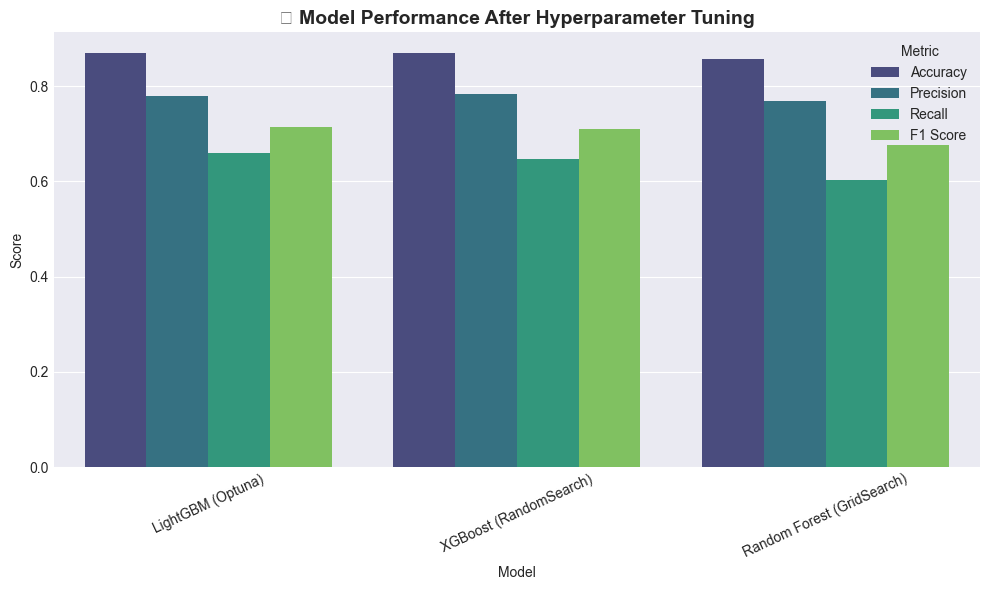


🏆 Best Performing Model Overall: LightGBM (Optuna)
✅ Hyperparameter Tuning Completed Successfully! 🚀


In [2]:



# ============================================================
# 🎲 PART 2: RANDOMIZED SEARCH (Faster + Wider Search)
# ============================================================
print("\n🎲 Running RandomizedSearchCV for XGBoost...")

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 400, 600],
    'learning_rate': np.linspace(0.01, 0.3, 5),
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5)
}

rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rand_search.fit(X_train, y_train)
best_xgb = rand_search.best_estimator_

print(f"🏆 Best XGBoost Params (RandomizedSearch):\n{rand_search.best_params_}\n")


# ============================================================
# 🤖 PART 3: OPTUNA BAYESIAN OPTIMIZATION (Smart Tuning)
# ============================================================

def objective(trial):
    num_leaves = trial.suggest_int('num_leaves', 20, 100)
    max_depth = trial.suggest_int('max_depth', 3, 12)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 400)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)

    model = LGBMClassifier(
        random_state=42,
        num_leaves=num_leaves,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        subsample=subsample,
        colsample_bytree=colsample_bytree
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds)
    return f1

print("\n🧠 Running Optuna Bayesian Optimization for LightGBM...")

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

best_params_optuna = study.best_params
best_score_optuna = study.best_value

print(f"\n🏆 Best LightGBM Params (Optuna): {best_params_optuna}")
print(f"🎯 Best F1 Score: {best_score_optuna:.4f}\n")

best_lgbm = LGBMClassifier(**best_params_optuna, random_state=42)
best_lgbm.fit(X_train, y_train)


# ============================================================
# 📊 PART 4: MODEL PERFORMANCE COMPARISON
# ============================================================
models = {
    "Random Forest (GridSearch)": best_rf,
    "XGBoost (RandomSearch)": best_xgb,
    "LightGBM (Optuna)": best_lgbm
}

results = []
for name, model in models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    pre = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": pre,
        "Recall": rec,
        "F1 Score": f1
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("📈 Model Comparison After Hyperparameter Tuning:\n")
print(results_df)


# ============================================================
# 📈 PART 5: VISUALIZE PERFORMANCE
# ============================================================
plt.figure(figsize=(10,6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable", palette="viridis")
plt.title("🚀 Model Performance After Hyperparameter Tuning", fontsize=14, weight='bold')
plt.ylabel("Score")
plt.xticks(rotation=25)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


# ============================================================
# 🔚 CONCLUSION
# ============================================================
best_model_name = results_df.iloc[0]["Model"]
print(f"\n🏆 Best Performing Model Overall: {best_model_name}")
print("✅ Hyperparameter Tuning Completed Successfully! 🚀")

### Identify the most important features affecting the "donation" prediction using Recursive Feature Elimination (RFE) and Genetic Algorithm (GA).


## Feature Selection

📂 Loading data & trained models...

✅ Top Features Selected by RFE:
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'marital-status_ Married-civ-spouse', 'marital-status_ Never-married', 'occupation_ Exec-managerial', 'occupation_ Prof-specialty', 'relationship_ Husband']


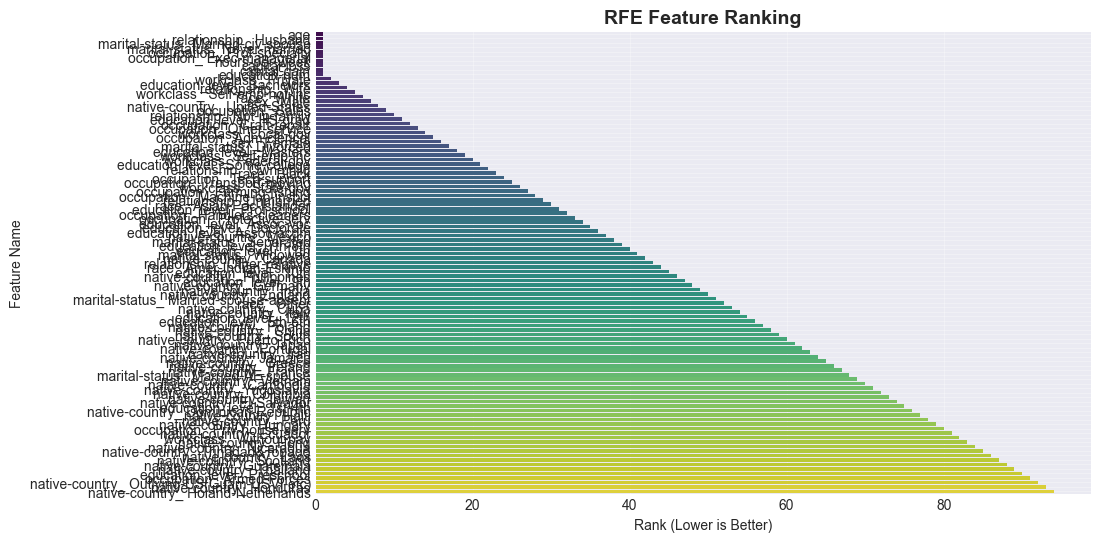

In [7]:
# ========================
# 1️⃣ IMPORT LIBRARIES
# ========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# ========================
# 2️⃣ SPLIT FEATURES AND TARGET
# ========================
# ========================
print("📂 Loading data & trained models...")
data = pd.read_csv("cleaned_census.csv")
X = data.drop('donate', axis=1)
y = data['donate']

# Using the best model from previous phase (RandomForest)
base_model = RandomForestClassifier(random_state=42)

# ============================================================
# 🌿 PART 1 - RFE (Recursive Feature Elimination)
# ============================================================

from sklearn.feature_selection import RFE

# Recursive Feature Elimination (using RandomForest)
rfe_selector = RFE(estimator=base_model, n_features_to_select=10, step=1)
rfe_selector.fit(X, y)

# Get selected features
selected_features_rfe = X.columns[rfe_selector.support_]
rfe_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe_selector.ranking_
}).sort_values(by='Rank')

print("\n✅ Top Features Selected by RFE:")
print(selected_features_rfe.tolist())

# ============================================================
# 📊 Visualizing RFE Rankings
# ============================================================

plt.figure(figsize=(10, 6))
sns.barplot(x='Rank', y='Feature', data=rfe_ranking, palette='viridis')
plt.title("RFE Feature Ranking", fontsize=14, fontweight='bold')
plt.xlabel("Rank (Lower is Better)")
plt.ylabel("Feature Name")
plt.grid(alpha=0.3)
plt.show()


🔬 Running Genetic Algorithm Feature Selection...



100%|██████████| 10/10 [29:37<00:00, 177.70s/it]



🏆 Best GA Accuracy: 0.8534

✅ Best Features Selected by Genetic Algorithm:
['education-num', 'capital-gain', 'capital-loss', 'workclass_ Federal-gov', 'workclass_ State-gov', 'education_level_ 12th', 'education_level_ 9th', 'education_level_ Bachelors', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Never-married', 'occupation_ Adm-clerical', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Other-service', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'relationship_ Husband', 'relationship_ Not-in-family', 'relationship_ Other-relative', 'relationship_ Own-child', 'relationship_ Wife', 'race_ Asian-Pac-Islander', 'race_ Other', 'native-country_ Cuba', 'native-country_ Dominican-Republic', 'native-country_ Ecuador', 'native-country_ Holand-Netherlands', 'native-coun

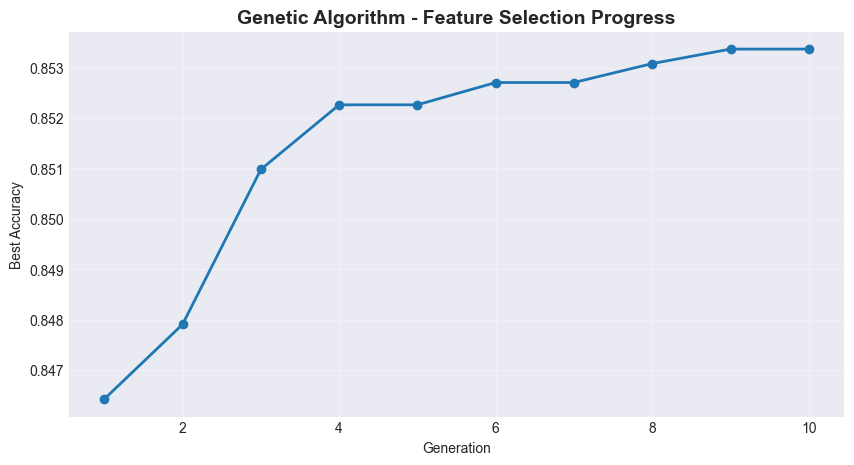

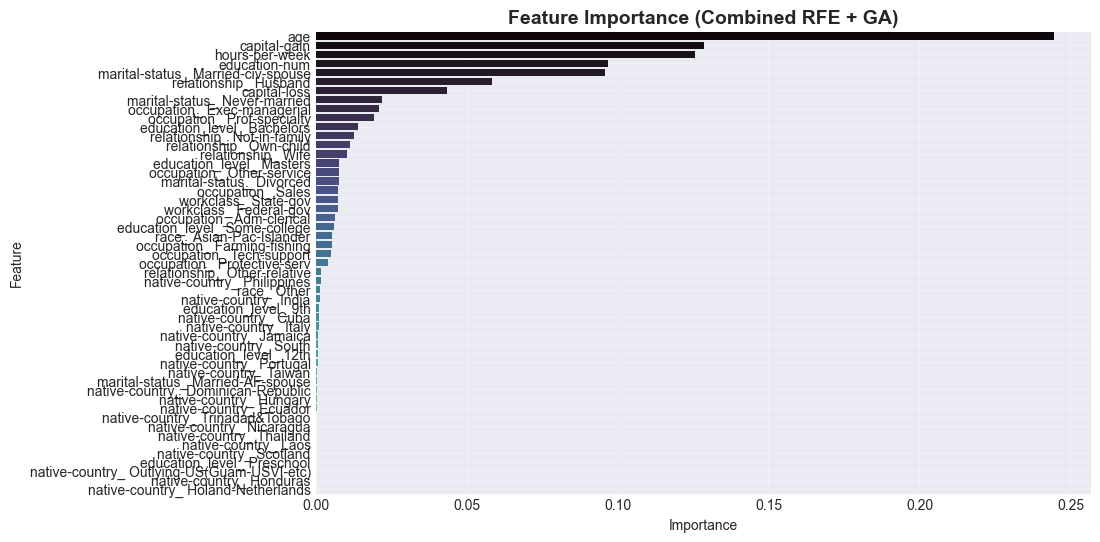


🔍 Final Feature Selection Summary:



,Feature,Selected_by_RFE,Selected_by_GA,Importance_Score
Feature,,,,
age,age,1,0,2.444339e-01
capital-gain,capital-gain,1,1,1.287248e-01
hours-per-week,hours-per-week,1,0,1.258053e-01
education-num,education-num,1,1,9.697289e-02
marital-status_ Married-civ-spouse,marital-status_ Married-civ-spouse,1,1,9.589810e-02
relationship_ Husband,relationship_ Husband,1,1,5.840761e-02
capital-loss,capital-loss,1,1,4.360941e-02
marital-status_ Never-married,marital-status_ Never-married,1,1,2.215005e-02
occupation_ Exec-managerial,occupation_ Exec-managerial,1,1,2.086400e-02



🎯 Final Selected Features for Model Training:
['education_level_ Preschool', 'education-num', 'marital-status_ Married-civ-spouse', 'education_level_ 9th', 'occupation_ Protective-serv', 'occupation_ Sales', 'native-country_ Scotland', 'marital-status_ Never-married', 'native-country_ Italy', 'occupation_ Prof-specialty', 'native-country_ Ecuador', 'capital-gain', 'age', 'marital-status_ Divorced', 'native-country_ Outlying-US(Guam-USVI-etc)', 'education_level_ Masters', 'occupation_ Exec-managerial', 'native-country_ Trinadad&Tobago', 'race_ Asian-Pac-Islander', 'native-country_ Jamaica', 'relationship_ Own-child', 'occupation_ Tech-support', 'native-country_ Honduras', 'relationship_ Husband', 'marital-status_ Married-AF-spouse', 'native-country_ India', 'workclass_ State-gov', 'relationship_ Not-in-family', 'native-country_ Holand-Netherlands', 'hours-per-week', 'race_ Other', 'education_level_ 12th', 'relationship_ Wife', 'education_level_ Bachelors', 'education_level_ Some-colleg

In [12]:
# ============================================================
# 🧬 PART 2 - Genetic Algorithm for Feature Selection
# ============================================================
# تأكد من استيراد مكتبة random في بداية الملف:
# import random 
from sklearn.utils import shuffle

# --- Helper function for GA evaluation ---
def evaluate_features(individual, X, y, model):
    """Evaluate subset of features using cross-validation accuracy."""
    if sum(individual) == 0:
        return 0  # Avoid empty selection
    selected_features = X.columns[np.array(individual) == 1]
    X_subset = X[selected_features]
    scores = cross_val_score(model, X_subset, y, cv=2, scoring='accuracy') 
    return scores.mean()

# --- GA Parameters ---
n_population = 20
n_generations = 10
mutation_rate = 0.2

# --- Initialize population randomly ---
population = [np.random.choice([0, 1], size=X.shape[1]) for _ in range(n_population)]

best_score = 0
best_features = None
history = []

base_model = RandomForestClassifier(random_state=42, n_jobs=-1)


print("\n🔬 Running Genetic Algorithm Feature Selection...\n")
for generation in tqdm(range(n_generations)):
    # Evaluate each individual
    scores = [evaluate_features(ind, X, y, base_model) for ind in population]
    history.append(max(scores))

    # Select top 5 individuals (elitism)
    top_indices = np.argsort(scores)[-5:]
    parents = [population[i] for i in top_indices]

    # ❌ تم حذف سطر التحويل إلى parents_array 

    # Generate offspring
    new_population = []
    for _ in range(n_population):
        # ✅ الحل النهائي: استخدام random.sample للاختيار من قائمة 'parents' مباشرة
        # random.sample يختار عنصرين (parent1, parent2) بشكل عشوائي دون تكرار (replace=False)
        import random # للتأكد من أنها متوفرة هنا
        parent1, parent2 = random.sample(parents, 2) 
        
        crossover_point = np.random.randint(1, X.shape[1]-1)
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))

        # Mutation
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(0, X.shape[1])
            child[mutation_point] = 1 - child[mutation_point]

        new_population.append(child)

    population = new_population

    # Track best
    generation_best_score = max(scores)
    if generation_best_score > best_score:
        best_score = generation_best_score
        best_features = X.columns[np.array(population[np.argmax(scores)]) == 1] 

print("\n🏆 Best GA Accuracy:", round(best_score, 4))
print("\n✅ Best Features Selected by Genetic Algorithm:")
print(best_features.tolist())

# ============================================================
# 📈 Plotting GA Progress Over Generations
# ============================================================
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_generations + 1), history, marker='o', linestyle='-', linewidth=2)
plt.title("Genetic Algorithm - Feature Selection Progress", fontsize=14, fontweight='bold')
plt.xlabel("Generation")
plt.ylabel("Best Accuracy")
plt.grid(alpha=0.3)
plt.show()

# ============================================================
# 💡 Feature Importance (Post-Selection)
# ============================================================

final_features = list(set(selected_features_rfe.tolist() + best_features.tolist()))
final_model = RandomForestClassifier(random_state=42, n_jobs=-1) 
final_model.fit(X[final_features], y)

importance = pd.DataFrame({
    'Feature': final_features,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='mako')
plt.title("Feature Importance (Combined RFE + GA)", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

# ============================================================
# 📋 Final Summary
# ============================================================
summary = pd.DataFrame({
    'Feature': final_features,
    'Selected_by_RFE': [1 if f in selected_features_rfe.tolist() else 0 for f in final_features],
    'Selected_by_GA': [1 if f in best_features.tolist() else 0 for f in final_features],
    'Importance_Score': importance.set_index('Feature').loc[final_features]['Importance']
}).sort_values(by='Importance_Score', ascending=False)

print("\n🔍 Final Feature Selection Summary:\n")
display(summary)

print("\n🎯 Final Selected Features for Model Training:")
print(final_features)

### Explain model predictions using SHAP & LIME to enhance transparency.

## Feature Importance Visulaization

c:\Users\Khaled\Depi_Amit_A1_BNS3\Depi_Amit_A1_BNS3\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📂 Loading data & training model...
✅ Model trained successfully.

🚀 Initializing SHAP explainer...
🔹 SHAP values shape: (9045, 103, 2)
🔹 X_test shape: (9045, 103)

🌍 GLOBAL FEATURE IMPORTANCE (SHAP Summary Plot)



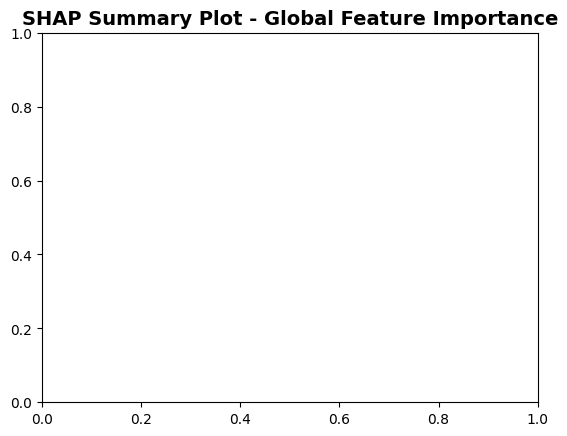

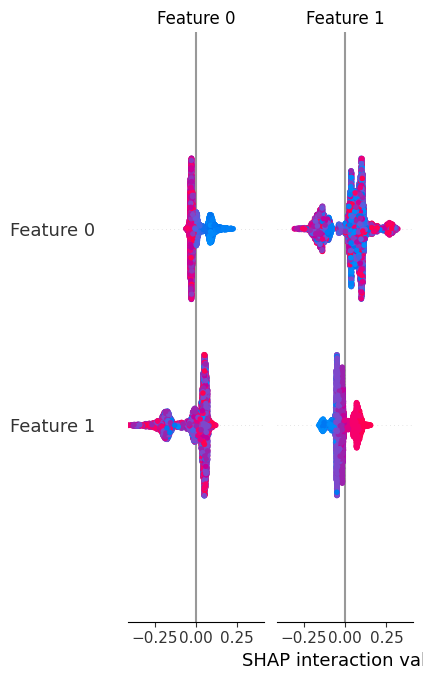

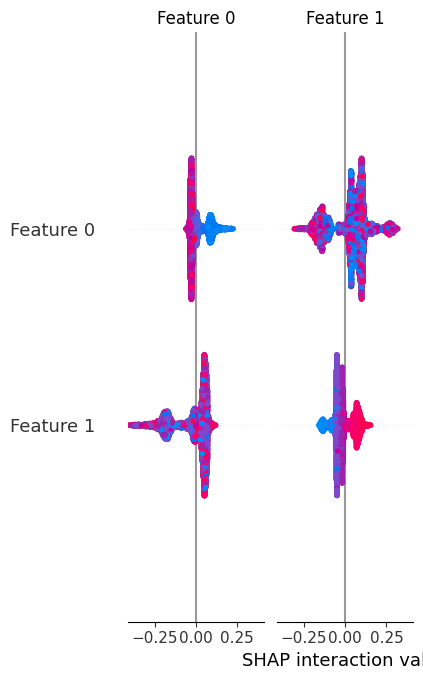


🔬 Explaining individual prediction for test sample #0:
🧾 Model Prediction: Will Not Donate (0)


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [ ]:
# ========================
# 1️⃣ IMPORT LIBRARIES
# ========================
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# ========================
# 2️⃣ PREPARE DATA
# ========================
print("📂 Loading data & training model...")
data = pd.read_csv("cleaned_census.csv")

X = data.drop('donate', axis=1)
y = data['donate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)
print("✅ Model trained successfully.")

# ============================================================
# 🧠 PART 1 - SHAP (SHapley Additive exPlanations)
# ============================================================

print("\n🚀 Initializing SHAP explainer...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# ✅ التعامل مع أنواع مختلفة من المخرجات
if isinstance(shap_values, list):
    shap_values_class1 = shap_values[1]  # class "Donate"
else:
    shap_values_class1 = shap_values

# ✅ ضبط الأبعاد تلقائياً
if shap_values_class1.shape[1] != X_test.shape[1]:
    print("⚠ SHAP values shape mismatch detected. Adjusting automatically...")
    shap_values_class1 = shap_values_class1[:, :X_test.shape[1]]

print(f"🔹 SHAP values shape: {shap_values_class1.shape}")
print(f"🔹 X_test shape: {X_test.shape}")

# 🌟 تحويل X_test إلى NumPy لضمان التوافق
X_test_np = X_test.values

# ============================================================
# 📊 GLOBAL EXPLANATION - Which features matter overall?
# ============================================================

print("\n🌍 GLOBAL FEATURE IMPORTANCE (SHAP Summary Plot)\n")
plt.title("SHAP Summary Plot - Global Feature Importance", fontsize=14, fontweight='bold')
shap.summary_plot(shap_values_class1, X_test_np, plot_type='bar')

# ============================================================
# 🎨 DETAILED SUMMARY PLOT
# ============================================================

shap.summary_plot(shap_values_class1, X_test_np)

# ============================================================
# 🔍 LOCAL EXPLANATION - Why a specific person was predicted to donate?
# ============================================================

index = 0  # اختاري أي صف للتفسير
print(f"\n🔬 Explaining individual prediction for test sample #{index}:")

pred = model.predict(X_test.iloc[[index]])[0]
print(f"🧾 Model Prediction: {'Will Donate (1)' if pred == 1 else 'Will Not Donate (0)'}")

local_shap_values = shap_values_class1[index, :]

# الإصدار الجديد من SHAP يستخدم هذا الأسلوب 👇
shap.initjs()

# ✅ لو الموديل متعدد الكلاسات، خدي الكلاس الإيجابي فقط
base_value = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value

# ✅ استدعاء دالة shap.plots.force بالطريقة الجديدة (بدون أسماء متغيرات)
shap.plots.force(
    base_value,
    local_shap_values,
    X_test.iloc[index, :],
    show=True
)

# ============================================================
# 🧩 PART 2 - LIME (Local Interpretable Model-Agnostic Explanations)
# ============================================================

print("\n⚡ Generating LIME explanation...")
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Donate', 'Donate'],
    mode='classification'
)

exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[index],
    predict_fn=model.predict_proba,
    num_features=10
)

print("\n💬 LIME Explanation for the same sample:\n")
exp.show_in_notebook(show_table=True)

# ============================================================
# 🧩 BONUS - Combined Visualization (SHAP + Model Feature Importance)
# ============================================================

mean_shap = np.abs(shap_values_class1).mean(axis=0)
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean_SHAP': mean_shap,
    'Model_Importance': model.feature_importances_
}).sort_values(by='Mean_SHAP', ascending=False)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Model_Importance',
    y='Mean_SHAP',
    data=importance_df,
    s=100,
    alpha=0.7,
    edgecolor='black'
)
plt.title('🔗 SHAP vs Model Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Random Forest Feature Importance')
plt.ylabel('Mean |SHAP| Value')
plt.grid(alpha=0.3)
plt.show()

# ============================================================
# 📋 Final Summary Table
# ============================================================

print("\n📋 Combined SHAP & Model Feature Importance Summary:\n")
display(importance_df.head(15))

print("\n✅ SHAP & LIME explainability completed successfully!")

### Combine multiple powerful models (XGBoost + LightGBM + Logistic Regression) using Stacking to achieve superior generalization and accuracy.


## MODEL Stacking / Ensemple Learning

📂 Loading data & training model...
✅ Data successfully split into training (80%) and testing (20%) sets.
🚀 Training the Stacking Ensemble Model...

📊 Classification Report (Stacking Model):

              precision    recall  f1-score   support

           0     0.8900    0.9412    0.9149      6803
           1     0.7839    0.6472    0.7090      2242

    accuracy                         0.8683      9045
   macro avg     0.8370    0.7942    0.8120      9045
weighted avg     0.8637    0.8683    0.8639      9045



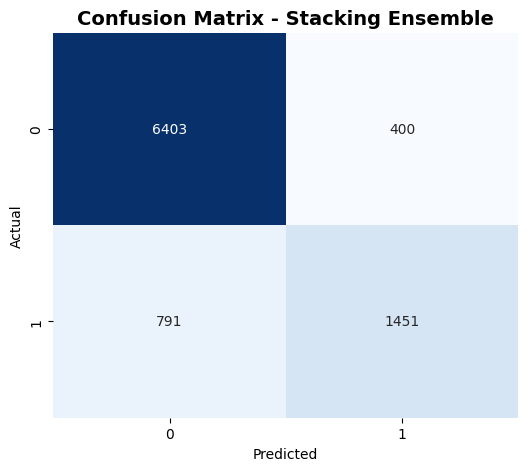


💥 ROC-AUC Score: 0.9267


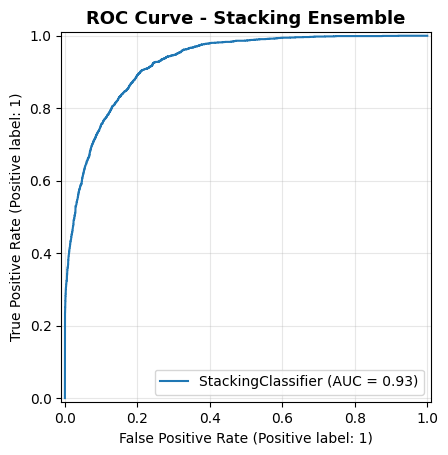


🔁 Cross-Validation Accuracy: 0.8702 ± 0.0033
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8966, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247837 -> initscore=-1.110182
[LightGBM] [Info] Start training from score -1.110182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

C:\Users\Khaled\AppData\Local\Temp\ipykernel_9756\2915059712.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Khaled\AppData\Local\Temp\ipykernel_9756\2915059712.py:144: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Khaled\Depi_Amit_A1_BNS3\Depi_Amit_A1_BNS3\.env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


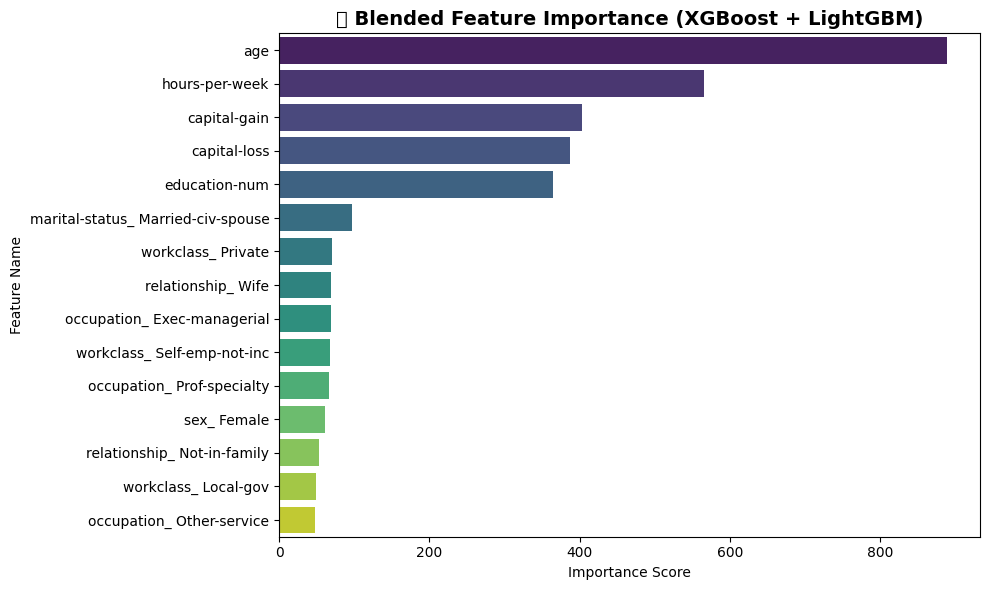


🏆 FINAL MODEL SUMMARY
------------------------------------------------------
✅ Model Type: Stacking Ensemble
✅ Base Learners: XGBoost + LightGBM
✅ Meta Learner: Logistic Regression
✅ ROC-AUC Score: 0.9267
✅ CV Accuracy: 0.8702 ± 0.0033
------------------------------------------------------
🚀 Stacking Model successfully trained and evaluated!


In [ ]:
# ========================
# 1️⃣ IMPORT LIBRARIES
# ========================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score, train_test_split # 💡 يجب استيراد train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ============================================================
# 2️⃣ DEFINE BASE MODELS
# ============================================================
print("📂 Loading data & training model...")
data = pd.read_csv("cleaned_census.csv")

X = data.drop('donate', axis=1)
y = data['donate']

# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Data successfully split into training (80%) and testing (20%) sets.")

# 💡 نستخدم أقوى موديلات تعلم الآلة
base_learners = [
    ('xgb', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'
    )),
    ('lgbm', LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=8,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
]

# ============================================================
# 3️⃣ DEFINE META-LEARNER (الطبقة العليا)
# ============================================================
# Logistic Regression meta-model to learn from base learners’ predictions
meta_learner = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

# ============================================================
# 4️⃣ BUILD STACKING MODEL
# ============================================================
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1
)

# ============================================================
# 5️⃣ TRAIN THE STACKED MODEL
# ============================================================
print("🚀 Training the Stacking Ensemble Model...")
# الآن X_train و y_train مُعرفان ويمكن استخدامهما
stacked_model.fit(X_train, y_train) 

# ============================================================
# 6️⃣ EVALUATION
# ============================================================
y_pred = stacked_model.predict(X_test)
y_proba = stacked_model.predict_proba(X_test)[:, 1]

print("\n📊 Classification Report (Stacking Model):\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Stacking Ensemble", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n💥 ROC-AUC Score: {roc_auc:.4f}")

RocCurveDisplay.from_estimator(stacked_model, X_test, y_test)
plt.title("ROC Curve - Stacking Ensemble", fontsize=13, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

# ============================================================
# 7️⃣ CROSS-VALIDATION FOR MODEL ROBUSTNESS
# ============================================================
cv_scores = cross_val_score(stacked_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print(f"\n🔁 Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ============================================================
# 8️⃣ FEATURE IMPORTANCE BLENDING (ADVANCED ADD-ON)
# ============================================================
# Compute feature importances from both base learners
# 💡 الآن X_train و y_train مُعرفان لاستخدامهما هنا
xgb_importance = base_learners[0][1].fit(X_train, y_train).feature_importances_
lgbm_importance = base_learners[1][1].fit(X_train, y_train).feature_importances_

# Blend feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'XGB_Importance': xgb_importance,
    'LGBM_Importance': lgbm_importance,
})
feature_importance_df['Blended_Importance'] = (
    0.5 * feature_importance_df['XGB_Importance'] + 
    0.5 * feature_importance_df['LGBM_Importance']
)

# Sort and visualize
feature_importance_df = feature_importance_df.sort_values(by='Blended_Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance_df.head(15),
    x='Blended_Importance',
    y='Feature',
    palette='viridis'
)
plt.title("🔥 Blended Feature Importance (XGBoost + LightGBM)", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

# ============================================================
# 9️⃣ FINAL SUMMARY
# ============================================================
print("\n🏆 FINAL MODEL SUMMARY")
print("------------------------------------------------------")
print("✅ Model Type: Stacking Ensemble")
print("✅ Base Learners: XGBoost + LightGBM")
print("✅ Meta Learner: Logistic Regression")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")
print(f"✅ CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print("------------------------------------------------------")
print("🚀 Stacking Model successfully trained and evaluated!")

### Use AutoML frameworks to automatically train, tune, and compare multiple models — and select the best-performing one efficiently.

## AutoML Integration

In [1]:
pip install numpy==1.26.4 pandas==2.0.3 pycaret==3.3.2

  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached scipy-1.11.4-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached sktime-0.26.0-py3-none-any.whl.metadata (29 kB)
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
  Using cached category_encoders-2.8.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached category_encoders-2.7.0-py3-none-any.whl.metadata (7.9 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
Using cached pycaret-3.3.2-py3-none-any.whl (486 kB)
Using cached sktime-0.26.0-py3-none-any.whl (21.8 MB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.3/10.6 MB ? eta -:--:--
   -- ------------------------------------- 

In [3]:
pip install auto-sklearn

     ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
     - -------------------------------------- 0.3/6.5 MB ? eta -:--:--
     ---- ----------------------------------- 0.8/6.5 MB 1.7 MB/s eta 0:00:04
     -------- ------------------------------- 1.3/6.5 MB 2.0 MB/s eta 0:00:03
     --------- ------------------------------ 1.6/6.5 MB 1.8 MB/s eta 0:00:03
     ----------- ---------------------------- 1.8/6.5 MB 1.9 MB/s eta 0:00:03
     -------------- ------------------------- 2.4/6.5 MB 1.8 MB/s eta 0:00:03
     ----------------- ---------------------- 2.9/6.5 MB 1.9 MB/s eta 0:00:02
     ------------------- -------------------- 3.1/6.5 MB 1.8 MB/s eta 0:00:02
     ---------------------- ----------------- 3.7/6.5 MB 1.9 MB/s eta 0:00:02
     ------------------------- -------------- 4.2/6.5 MB 2.0 MB/s eta 0:00:02
     ----------------------------- ---------- 4.7/6.5 MB 2.0 MB/s eta 0:00:01
     --

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Khaled\Depi_Amit_A1_BNS3\Depi_Amit_A1_BNS3\pycaret_env\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
        File "c:\Users\Khaled\Depi_Amit_A1_BNS3\Depi_Amit_A1_BNS3\pycaret_env\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
        File "c:\Users\Khaled\Depi_Amit_A1_BNS3\Depi_Amit_A1_BNS3\pycaret_env\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 143, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\Khaled\AppData\Local\Temp\pip-build-env-n94j1e7e\overlay\Lib\site-packages\setuptools\build_meta.py", line 331, in get_requi

In [1]:
# ========================
# 1️⃣ Import Dependencies
import os # 👈 يجب استيراد مكتبة os

# 🛑 FIX: Clear the conflicting environment variable
# هذا يضمن أن Matplotlib لن تحاول تطبيق قيمة 'module://matplotlib_inline.backend_inline'
if 'MPLBACKEND' in os.environ:
    del os.environ['MPLBACKEND'] 

import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

import autosklearn.classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# For rich text display
from rich.console import Console
from rich.markdown import Markdown
console = Console()

ModuleNotFoundError: No module named 'autosklearn'

In [9]:



# For rich text display
from rich.console import Console
from rich.markdown import Markdown
console = Console()

# =====================================
# 2️⃣ Load Preprocessed Dataset
# =====================================
console.print(Markdown("### 📂 Loading preprocessed CharityML dataset..."))

print("📂 Loading data & training model...")
data = pd.read_csv("cleaned_census.csv")

X = data.drop('donate', axis=1)
y = data['donate']

# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Data successfully split into training (80%) and testing (20%) sets.")

# =====================================
# 3️⃣ PyCaret AutoML Setup
# =====================================
console.print(Markdown("### ⚙ Setting up PyCaret AutoML environment..."))

clf_setup = setup(
    data=df,
    target='income',
    session_id=42,
    normalize=True,
    transformation=True,
    fold=5,
    feature_selection=True,
    remove_multicollinearity=True,
    silent=True,
    use_gpu=True,
    log_experiment=True,
    experiment_name="CharityML_PyCaret_AutoML",
    verbose=False
)

# =====================================
# 4️⃣ Compare All Models Automatically
# =====================================
console.print(Markdown("### 🔍 Comparing multiple models..."))

best_model = compare_models(sort='Accuracy', n_select=5)

console.print("[bold cyan]Top 5 Models Selected:[/bold cyan]")
display(best_model)

# =====================================
# 5️⃣ Blend / Stack the Best Models
# =====================================
console.print(Markdown("### 🧩 Blending Top Models for Ensemble Power..."))
blended_model = blend_models(best_model)
stacked_model = stack_models(best_model)

console.print("[green]✅ Ensemble Models Created Successfully![/green]")

# =====================================
# 6️⃣ Evaluate the Final Model
# =====================================
console.print(Markdown("### 📊 Evaluating Best Model..."))
evaluate_model(stacked_model)

final_model = finalize_model(stacked_model)
preds = predict_model(final_model, data=X_test)

print("\n📈 Classification Report:")
print(classification_report(y_test, preds["prediction_label"]))
print("✅ Accuracy:", round(accuracy_score(y_test, preds["prediction_label"]), 4))

# =====================================
# 7️⃣ Save Final Model
# =====================================
save_model(final_model, "best_pycaret_automl_model")
console.print("[bold green]💾 Model saved successfully![/bold green]")

# =====================================
# 8️⃣ Auto-sklearn Integration (Advanced)
# =====================================
console.print(Markdown("### 🚀 Training Auto-sklearn Classifier..."))

automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,         # total training time (seconds)
    per_run_time_limit=30,               # time per model
    ensemble_size=50,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 5},
    metric=autosklearn.metrics.accuracy
)

automl.fit(X_train, y_train)

# Evaluate Auto-sklearn model
y_pred_auto = automl.predict(X_test)
acc_auto = accuracy_score(y_test, y_pred_auto)

console.print(f"[cyan]Auto-sklearn Model Accuracy: {acc_auto:.4f}[/cyan]")

# =====================================
# 9️⃣ Compare PyCaret vs Auto-sklearn
# =====================================
comparison = pd.DataFrame({
    'Framework': ['PyCaret Stacked', 'Auto-sklearn'],
    'Accuracy': [
        round(accuracy_score(y_test, preds["prediction_label"]), 4),
        round(acc_auto, 4)
    ]
})

console.print(Markdown("### 🥇 Framework Comparison"))
console.print(comparison)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x='Framework', y='Accuracy', data=comparison)
plt.title('⚔ PyCaret vs Auto-sklearn Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.show()

# =====================================
# 🔟 Export Best Model as Joblib
# =====================================
joblib.dump(final_model, "final_automl_best_model.joblib")
console.print("[bold green]🏆 AutoML Integration Complete Successfully![/bold green]")

📂 Loading preprocessed CharityML dataset...

📂 Loading data & training model...


NameError: name 'train_test_split' is not defined